In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

Edmund Wu                   261033501
Tianyi Xu                   261082272
Santosh Passoubady          261098017

# Data Preperation
1. Dataset 1: Boston Housing dataset: [link](https://www.kaggle.com/datasets/fedesoriano/the-boston-houseprice-data?select=boston)
2. Dataset 2: Wine dataset: [link](https://archive.ics.uci.edu/dataset/109/wine)

## Boston Housing

In [ ]:
# Boston Housing
boston = np.genfromtxt('boston.csv', delimiter=",", usemask=False)
boston = np.delete(boston, 11, 1)   # removes B
boston = boston[1:, :]              # removes first row of nan

X_housing = boston[:, :12]
y_housing = boston[:, 12]

print(X_housing.shape, y_housing.shape)
print(X_housing.dtype, y_housing.dtype)

(506, 12) (506,)
float64 float64


In [ ]:
# Boston Housing Pandas statistics
raw_df_boston = pd.read_csv('boston.csv')
print(raw_df_boston.info())
print(raw_df_boston.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB
None
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


In [ ]:
print(raw_df_boston.head())
raw_df_boston.describe()

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


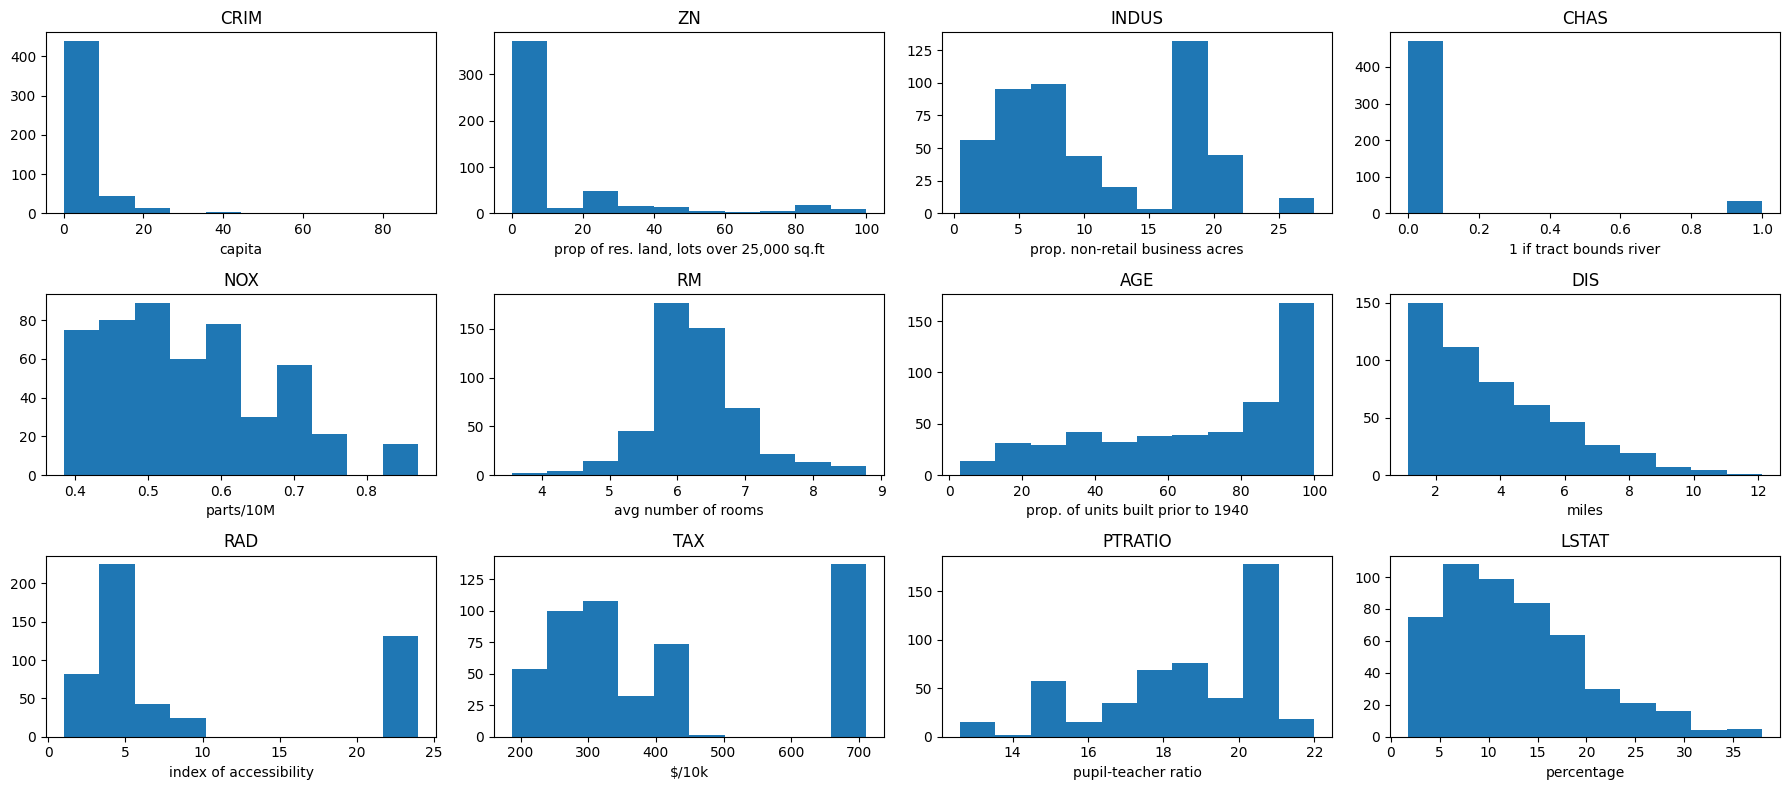

In [ ]:
# Visualize distribution (barplot)
column_names_boston = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','LSTAT']
att_metric_boston = ['capita', 'prop of res. land, lots over 25,000 sq.ft', 'prop. non-retail business acres',
              '1 if tract bounds river', 'parts/10M', 'avg number of rooms', 'prop. of units built prior to 1940',
              'miles', 'index of accessibility', '$/10k', 'pupil-teacher ratio', 'percentage']
fig, axes = plt.subplots(3, 4, figsize = (18, 8))

k = 0
for i in range(3):
    for j in range(4):
        axes[i, j].hist(X_housing[:, k], alpha=1)
        axes[i, j].set(xlabel = f"{att_metric_boston[k]}", title = f"{column_names_boston[k]}")
        k += 1

fig.tight_layout()
plt.show()

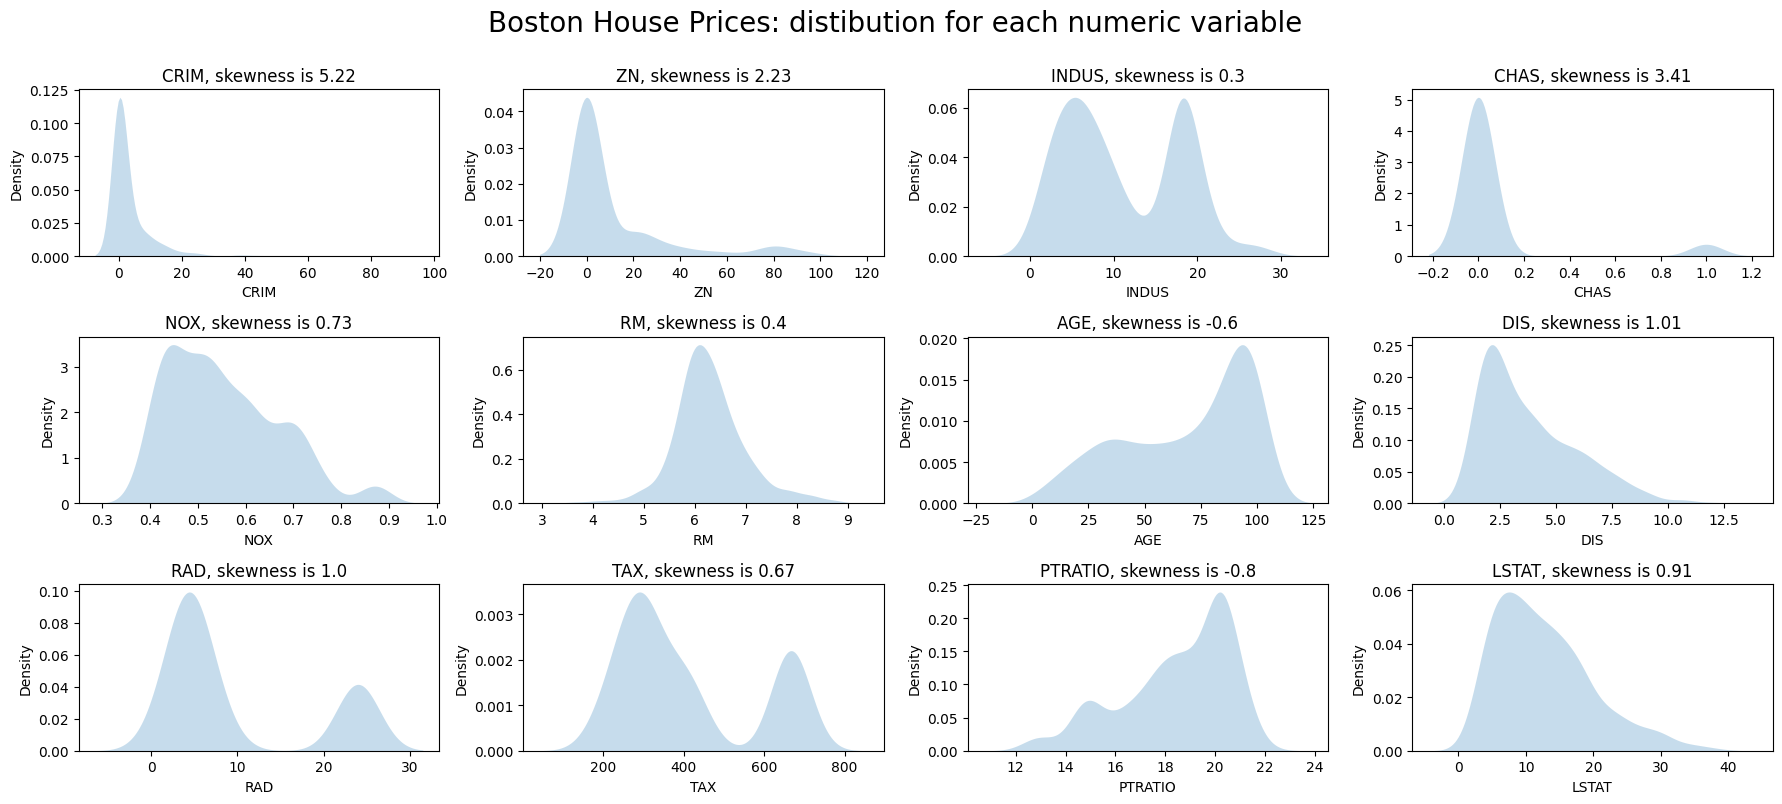

In [ ]:
# Visualize distribution
def dist_custom(dataset, columns_list, subtitle):
    fig, axs = plt.subplots(3, 4,figsize=(18,8))
    fig.suptitle(subtitle,y=1, size=20)
    axs = axs.flatten()
    for i, data in enumerate(columns_list):
        sns.kdeplot(dataset[data], ax=axs[i], fill=True, linewidth=0)
        axs[i].set_title(data + ', skewness is '+str(round(dataset[data].skew(axis = 0, skipna = True),2)))

dist_custom(dataset=raw_df_boston, columns_list=column_names_boston, subtitle='Boston House Prices: distibution for each numeric variable')
plt.tight_layout()

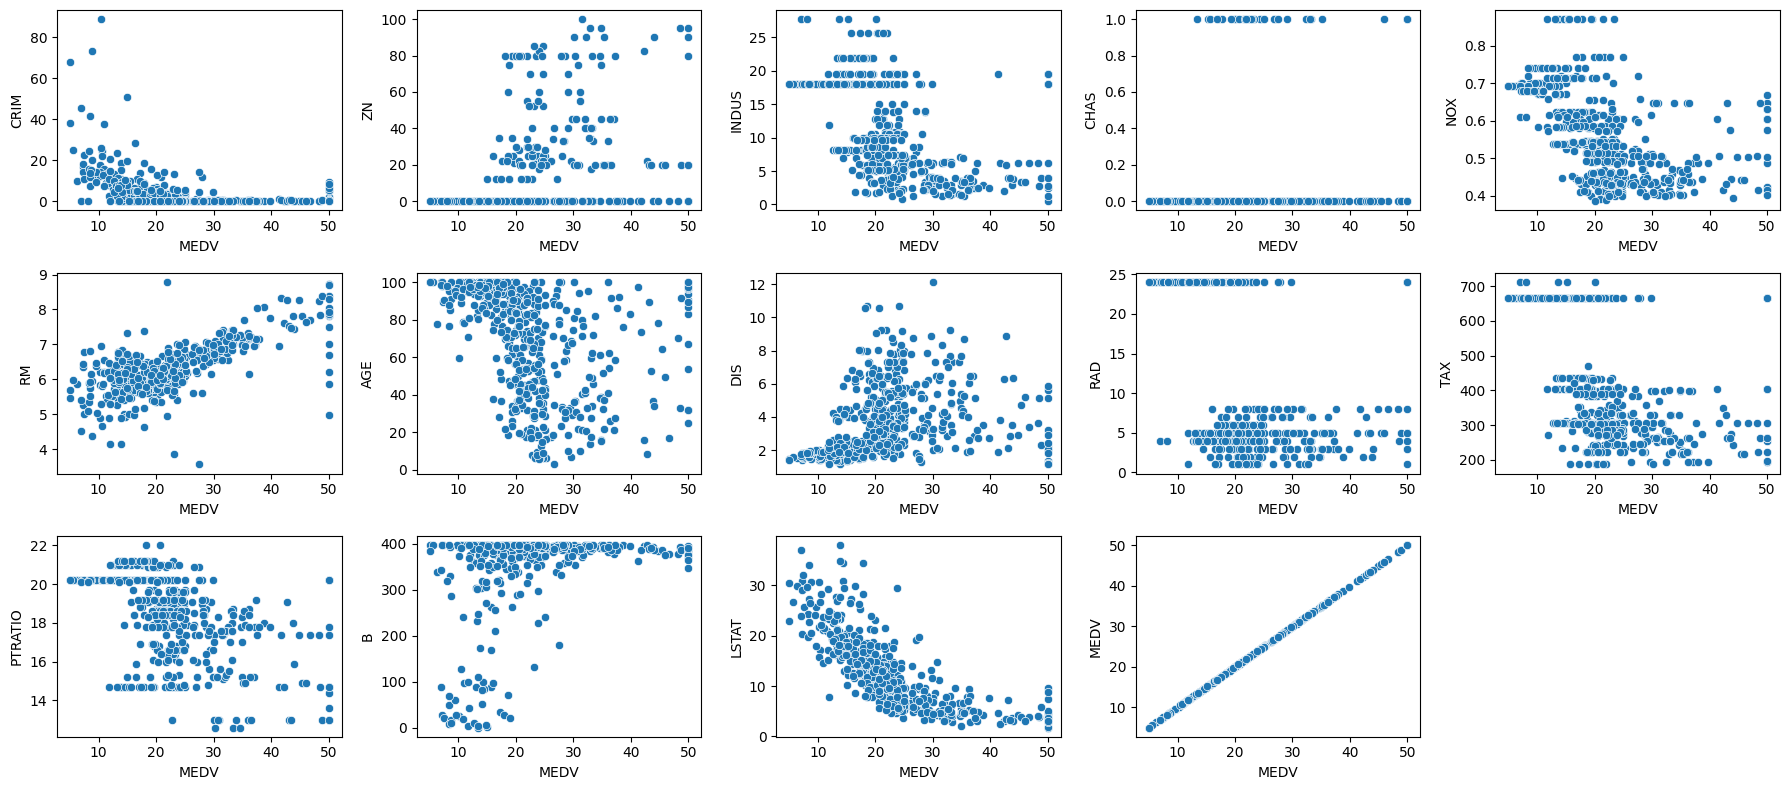

In [ ]:
# Visualize individual features to target relationship
plt.figure(figsize = (18, 8))
plotnumber = 1

for column in raw_df_boston:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.scatterplot(x = raw_df_boston['MEDV'], y = raw_df_boston[column])
    plotnumber += 1

plt.tight_layout()
plt.show()

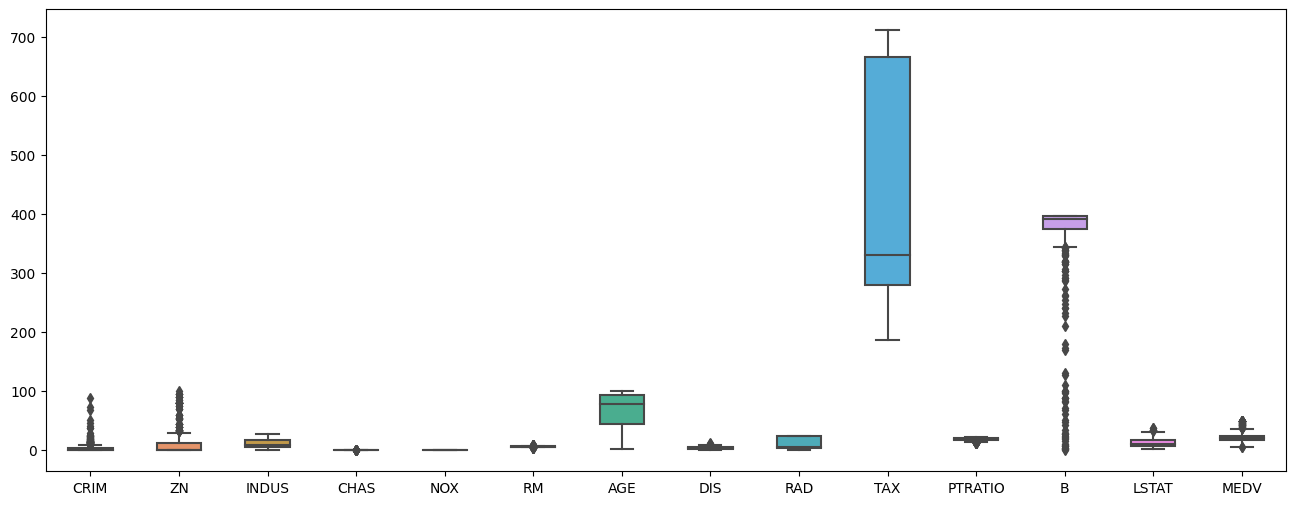

In [ ]:
# Visualize outliers
plt.figure(figsize = (16, 6))
sns.boxplot(data=raw_df_boston, width=0.5)
plt.show()

---

## Wine Classification

In [ ]:
# Wine Dataset
wine = np.genfromtxt('wine.data', delimiter=",", usemask=False)
X_wine = wine[:, 1:]
y_wine = wine[:, 0]
print(X_wine.shape, y_wine.shape)

(178, 13) (178,)


In [ ]:
!pip install ucimlrepo
from ucimlrepo import fetch_ucirepo

In [ ]:
# Wine dataset Pandas statistics
wine = fetch_ucirepo(id=109)
raw_df_feature_wine = wine.data.features
raw_df_target_wine = wine.data.targets
raw_df_wine = raw_df_feature_wine.join(raw_df_target_wine)
print(raw_df_wine.info())
print(raw_df_wine.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Alcohol                       178 non-null    float64
 1   Malicacid                     178 non-null    float64
 2   Ash                           178 non-null    float64
 3   Alcalinity_of_ash             178 non-null    float64
 4   Magnesium                     178 non-null    int64  
 5   Total_phenols                 178 non-null    float64
 6   Flavanoids                    178 non-null    float64
 7   Nonflavanoid_phenols          178 non-null    float64
 8   Proanthocyanins               178 non-null    float64
 9   Color_intensity               178 non-null    float64
 10  Hue                           178 non-null    float64
 11  0D280_0D315_of_diluted_wines  178 non-null    float64
 12  Proline                       178 non-null    int64  
 13  class

In [ ]:
print(raw_df_wine.head())
raw_df_wine.describe()

   Alcohol  Malicacid   Ash  Alcalinity_of_ash  Magnesium  Total_phenols  \
0    14.23       1.71  2.43               15.6        127           2.80   
1    13.20       1.78  2.14               11.2        100           2.65   
2    13.16       2.36  2.67               18.6        101           2.80   
3    14.37       1.95  2.50               16.8        113           3.85   
4    13.24       2.59  2.87               21.0        118           2.80   

   Flavanoids  Nonflavanoid_phenols  Proanthocyanins  Color_intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   0D280_0D315_of_diluted_wines  Proline  class  
0                 

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline,class
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,1.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,1.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,2.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,3.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,3.000000


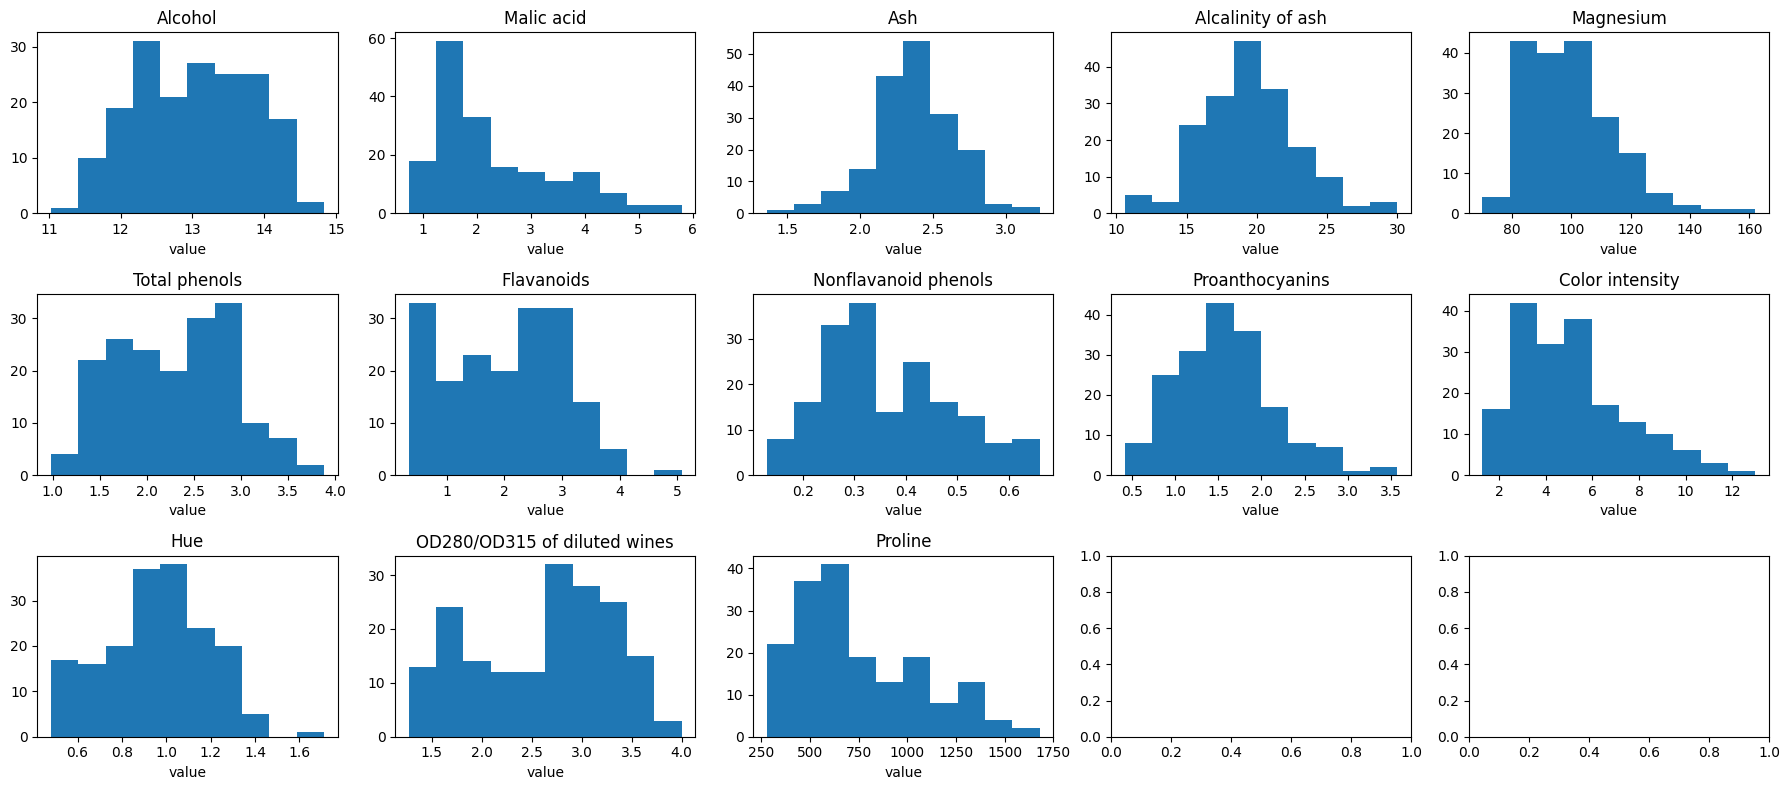

In [ ]:
# Visualize distribution (barplot)
column_names_wine = ['Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium',
            'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
            'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']

fig, axes = plt.subplots(3, 5, figsize = (18, 8))

k = 0
for i in range(3):
    for j in range(5):
        if k == 13:
            break
        axes[i, j].hist(X_wine[:, k], alpha=1)
        axes[i, j].set(xlabel = "value", title = f"{column_names_wine[k]}")
        k += 1

fig.tight_layout()
plt.show()

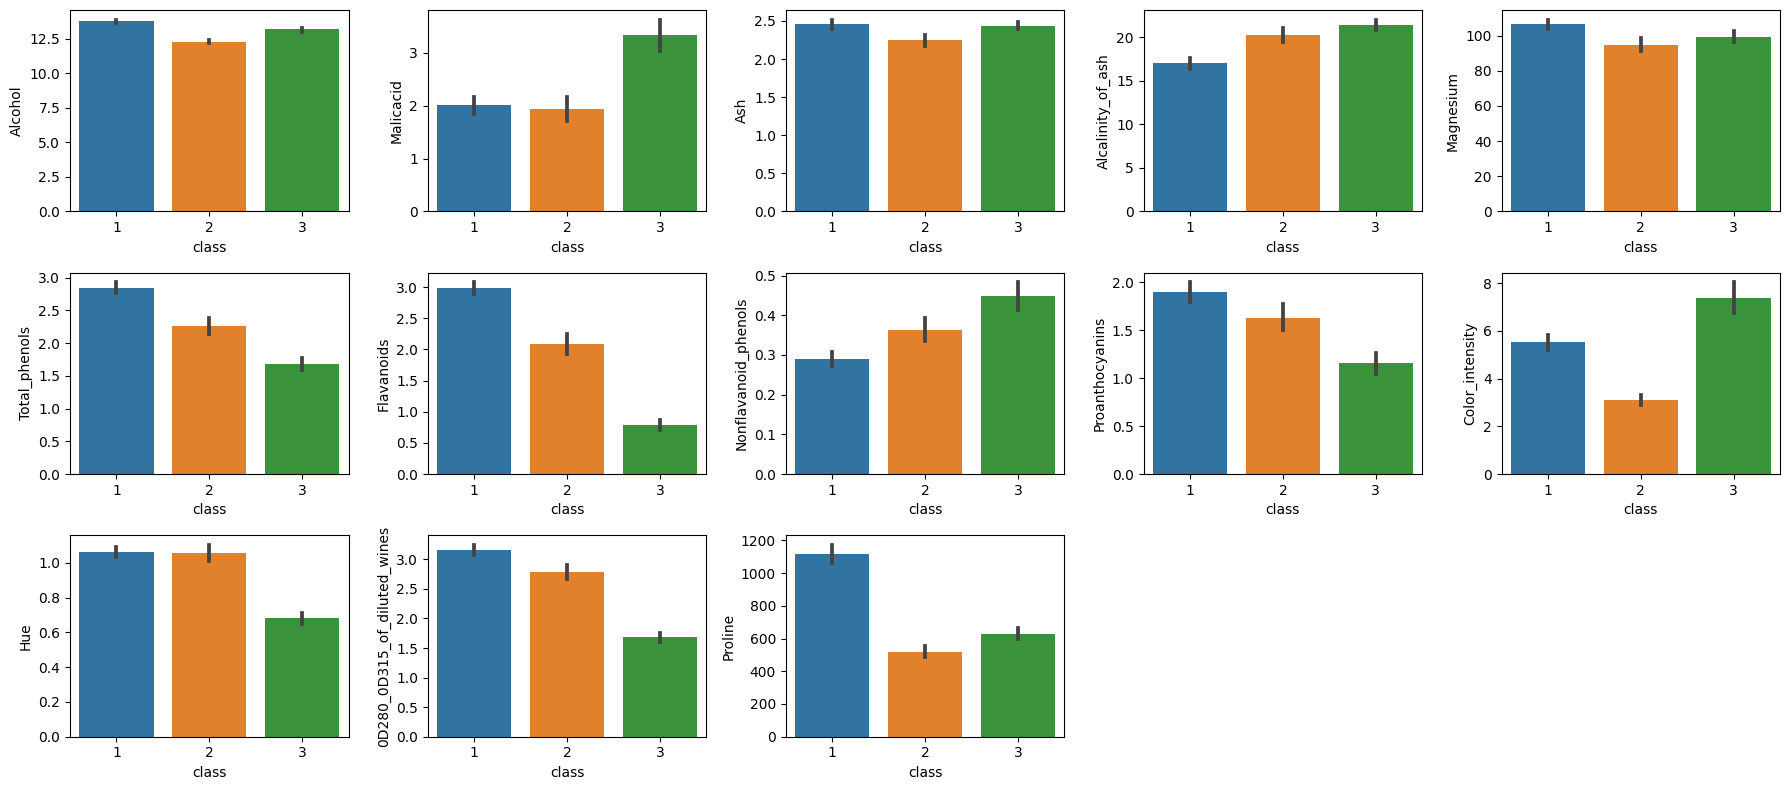

In [ ]:
# Visualize features per class
plt.figure(figsize = (18, 8))
plotnumber = 1

for column in raw_df_feature_wine:
    if plotnumber <= 13:
        ax = plt.subplot(3, 5, plotnumber)
        sns.barplot(x = 'class', y = raw_df_feature_wine[column], data=raw_df_wine)
    plotnumber += 1

plt.tight_layout()
plt.show()

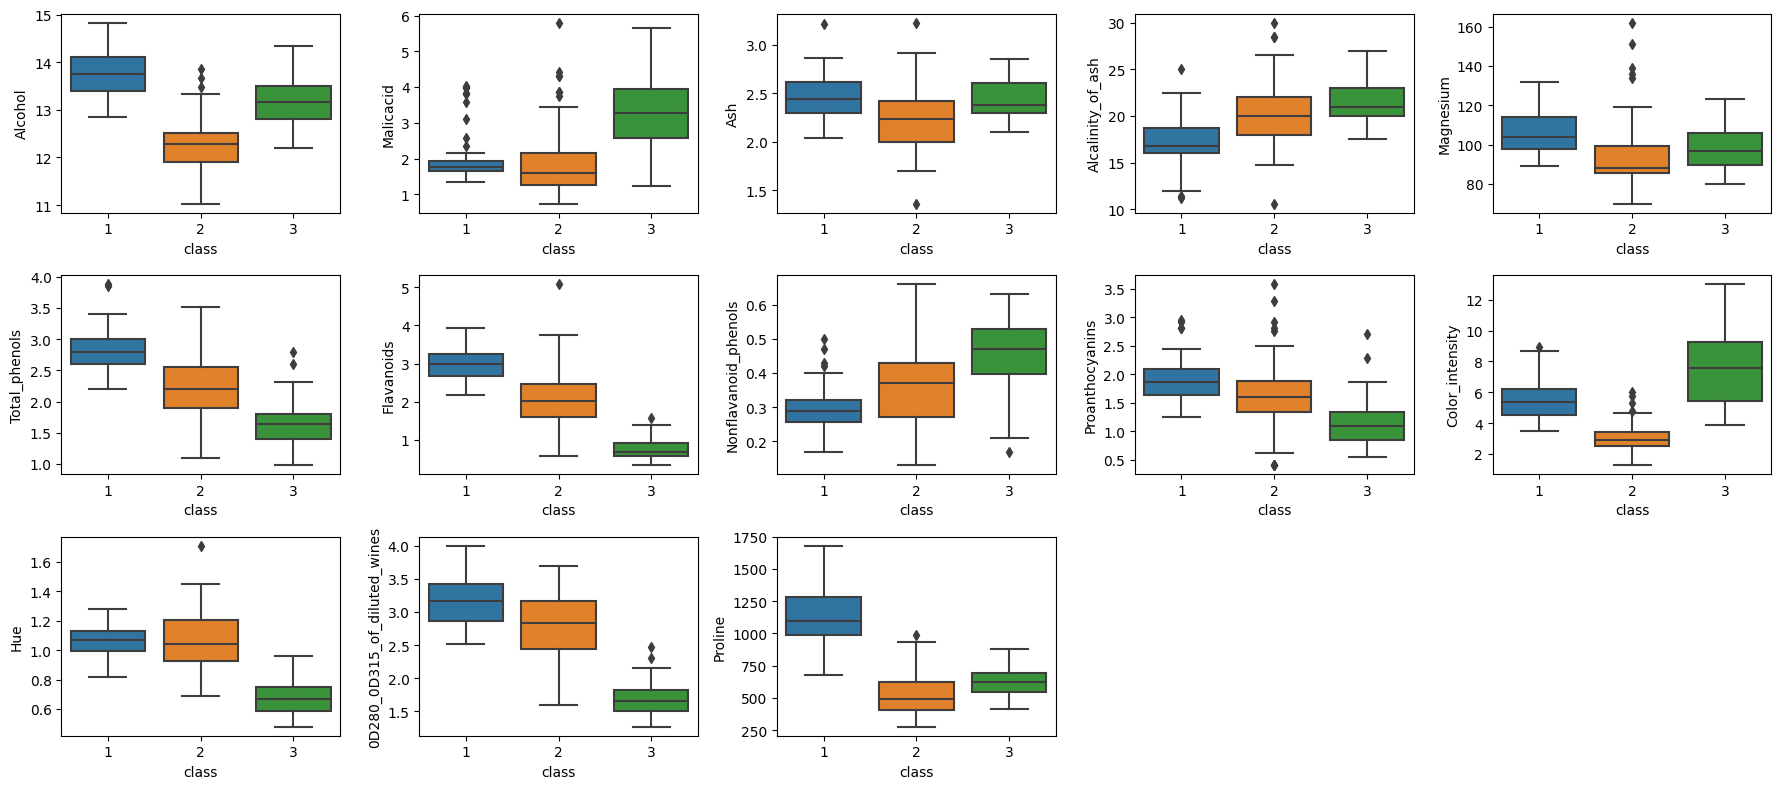

In [ ]:
# Visualize outliers
plt.figure(figsize = (18, 8))
plotnumber = 1

for column in raw_df_feature_wine:
    if plotnumber <= 13:
        ax = plt.subplot(3, 5, plotnumber)
        sns.boxplot(x = 'class', y = raw_df_feature_wine[column], data=raw_df_wine)
    plotnumber += 1

plt.tight_layout()
plt.show()

# Linear and Logistic Regression
1. Implement analytical linear regression solution for Dataset 1.
2. Implement logistic regression with gradient descent for Dataset 2.
3. Implement mini-batch stochastic gradient descent for both linear and logistic regression.

## Analytical Linear Regression

In [ ]:
class LinearRegression:
  def __init__(self):
    self.W = None


  def fit(self, X, y):
    """
    Inputs:
    - X: A numpy array of shape (N, D) containing training data; there are N
      training samples each of dimension D.
    - y: A numpy array of shape (N, ) containing training labels.
    Returns:
    - self.W: A numpy array of shape (D+1, ) containing linear least squares estimates.
      Also contains the weights of the intercept.
    """
    N, D = X.shape
    X = np.column_stack([np.ones(N), X])
    self.W, loss = self.analytical_least_squares_loss(X, y)
    return (loss, self.W)


  def analytical_least_squares_loss(self, X, y):
    W = np.linalg.inv(X.T @ X) @ X.T @ y
    loss = np.mean((y - X @ W) ** 2)
    return W, loss


  def predict(self, X):
    """
    Inputs:
    - X: input of shape (M, D)
    Returns:
    - Predicted target given fitted weights.
    """
    X = np.column_stack([np.ones(X.shape[0]), X])
    return X @ self.W

## Logistic Regression with Softmax Loss

In [ ]:
class LogisticRegression:
  def __init__(self):
    self.W = None


  def fit(self,
          X,
          y,
          max_iters=1000,
          eps=1e-5,
          learning_rate=1e-3,
          verbose=False,
          reg=0
          ):
    """
    - X: shape (N, D)
    - y: shape (N, )
    - self.W: shape (D+1, C)
    """
    N, D = X.shape
    C = len(np.unique(y))
    X = np.column_stack([np.ones(N), X])
    y = y.astype(int)
    self.W = np.zeros((D+1, C))

    dW = np.inf
    iters = 0
    loss_history = []
    while np.linalg.norm(dW) > eps and iters < max_iters:
      # evaluate gradient and loss
      dW, loss = self.softmax_loss(X, y, reg)
      loss_history.append(loss)
      # update weights
      self.W -= learning_rate * dW
      iters += 1

      if verbose and iters % 100 == 0:
        print("iteration %d: loss %f" % (iters, loss))

    return loss_history


  def predict(self, X):
    """
    Input:
    - X: numpy array of dimension (M, D)
    Returns:
    - predicted_labels of dimension (M, )
    """
    X = np.column_stack([np.ones(X.shape[0]), X])
    logits = X @ self.W
    softmax = np.exp(logits - logits.max()) / (np.sum(logits, axis=1, keepdims=True) + 1e-14)
    predicted_labels = np.argmax(softmax, axis=1)
    return predicted_labels + 1


  def softmax_loss(self, X, y, reg):
    N = X.shape[0]
    C = self.W.shape[1]

    y_hot = np.zeros((N, C))
    y_hot[np.arange(N), y-1] = 1

    z_hat = X @ self.W
    exp_z_hat = np.exp(z_hat - z_hat.max())
    exp_z_hat_sum = np.sum(exp_z_hat, axis=1, keepdims=True)
    softmax = np.sum(exp_z_hat * y_hot, axis=1, keepdims=True) / (exp_z_hat_sum + 1e-14)

    loss = -1/N * np.sum(np.log(softmax)) + reg * np.sum(self.W[1:, :] * self.W[1:, :])
    dW = 1/N * X.T @ (exp_z_hat/(exp_z_hat_sum + 1e-14) - y_hot) + 2 * reg * self.W
    dW[0] -= 2 * reg * self.W[0, :] # do not penalize the bias

    return dW, loss

## Mini-Batch Gradient Descent

In [ ]:
class SGD:
  def __init__(self, sgd_type):
    """
    Inputs:
    - sgd_type: String of either 'linear or 'logistic'
    """
    self.W = None
    if sgd_type != 'linear' and sgd_type != 'logistic':
      raise Exception("Select either linear or logistic regression.")
    self.sgd_type = sgd_type


  def fit(self,
          X,
          y,
          max_iters=1000,
          eps=1e-5,
          learning_rate=1e-2,
          verbose=False,
          batch_size=16,
          reg=0
          ):

    N, D = X.shape
    C = len(np.unique(y))
    X = np.column_stack([np.ones(N), X])
    y = y.astype(int)
    rng = np.random.default_rng()
    if self.W is None:
      if self.sgd_type == 'linear':
        self.W = 0.001 * rng.standard_normal(D+1)
      elif self.sgd_type == 'logistic':
        self.W = np.zeros((D+1, C))

    loss_history = []
    for iters in range(max_iters):
      batch = rng.choice(np.arange(N), batch_size, replace=False)
      X_batch = X[batch, :]
      y_batch = y[batch]

      # evaluate loss and gradient
      if self.sgd_type == 'linear':
        dW, loss = self.linear_loss(X_batch, y_batch)
      elif self.sgd_type == 'logistic':
        dW, loss = self.softmax_loss(X_batch, y_batch, reg)
      # update weights
      loss_history.append(loss)
      self.W -= learning_rate * dW

      if verbose and iters % 100 == 0:
        print("iteration %d: loss %f" % (iters, loss))

    return loss_history


  def predict(self, X):
    X = np.column_stack([np.ones(X.shape[0]), X])
    if self.sgd_type == 'linear':
      return X @ self.W
    elif self.sgd_type == 'logistic':
      logits = X @ self.W
      softmax = np.exp(logits - logits.max(axis=1, keepdims=True)+ 1e-14)
      softmax /= softmax.sum(axis=1, keepdims=True)
      return np.argmax(softmax, axis=1) + 1


  def linear_loss(self, X, y):
    N = X.shape[0]
    dW = np.dot(X.T, np.dot(X, self.W) - y) / N
    loss = np.sum((y - X @ self.W) ** 2) / N
    return dW, loss


  def softmax_loss(self, X, y, reg):
    N = X.shape[0]
    C = self.W.shape[1]

    y_hot = np.zeros((N, C))
    y_hot[np.arange(N), y-1] = 1

    z_hat = X @ self.W
    exp_z_hat = np.exp(z_hat - z_hat.max())
    exp_z_hat_sum = np.sum(exp_z_hat, axis=1, keepdims=True)
    softmax = np.sum(exp_z_hat * y_hot, axis=1, keepdims=True) / (exp_z_hat_sum + 1e-14)

    loss = -1/N * np.sum(np.log(softmax)) + reg * np.sum(self.W[1:, :] * self.W[1:, :])
    dW = 1/N * X.T @ (exp_z_hat/(exp_z_hat_sum + 1e-14) - y_hot) + 2 * reg * self.W
    dW[0] -= 2 * reg * self.W[0, :] # do not penalize the bias

    return dW, loss


# Momentum



In [ ]:
class Momentum:
  def __init__(self, sgd_type):
    """
    Inputs:
    - sgd_type: String of either 'linear or 'logistic'
    """
    self.W = None
    self.momentum_velocity = 0
    self.momentum = 0.9
    if sgd_type != 'linear' and sgd_type != 'logistic':
      raise Exception("Select either linear or logistic regression.")
    self.sgd_type = sgd_type


  def fit(self,
          X,
          y,
          max_iters=1000,
          eps=1e-5,
          learning_rate=1e-2,
          verbose=False,
          batch_size=16,
          reg=0
          ):

    N, D = X.shape
    C = len(np.unique(y))
    X = np.column_stack([np.ones(N), X])
    y = y.astype(int)
    rng = np.random.default_rng()
    if self.W is None:
      if self.sgd_type == 'linear':
        self.W = 0.001 * rng.standard_normal(D+1)
      elif self.sgd_type == 'logistic':
        self.W = np.zeros((D+1, C))

    loss_history = []
    for iters in range(max_iters):
      batch = rng.choice(np.arange(N), batch_size, replace=False)
      X_batch = X[batch, :]
      y_batch = y[batch]

      # evaluate loss and gradient
      if self.sgd_type == 'linear':
        dW, loss = self.linear_loss(X_batch, y_batch)
      elif self.sgd_type == 'logistic':
        dW, loss = self.softmax_loss(X_batch, y_batch, reg)
      # update weights
      loss_history.append(loss)
      self.W -= learning_rate * dW

      if verbose and iters % 100 == 0:
        print("iteration %d: loss %f" % (iters, loss))

    return loss_history


  def predict(self, X):
    X = np.column_stack([np.ones(X.shape[0]), X])
    if self.sgd_type == 'linear':
      return X @ self.W
    elif self.sgd_type == 'logistic':
      logits = X @ self.W
      softmax = np.exp(logits - logits.max(axis=1, keepdims=True)+ 1e-14)
      softmax /= softmax.sum(axis=1, keepdims=True)
      return np.argmax(softmax, axis=1) + 1


  def linear_loss(self, X, y):
    N = X.shape[0]
    dW = np.dot(X.T, np.dot(X, self.W) - y) / N
    self.momentum_velocity = self.momentum*self.momentum_velocity + (1-self.momentum)*dW
    loss = np.sum((y - X @ self.W) ** 2) / N
    return self.momentum_velocity, loss


  def softmax_loss(self, X, y, reg):
    N = X.shape[0]
    C = self.W.shape[1]

    y_hot = np.zeros((N, C))
    y_hot[np.arange(N), y-1] = 1

    z_hat = X @ self.W
    exp_z_hat = np.exp(z_hat - z_hat.max())
    exp_z_hat_sum = np.sum(exp_z_hat, axis=1, keepdims=True)
    softmax = np.sum(exp_z_hat * y_hot, axis=1, keepdims=True) / (exp_z_hat_sum + 1e-14)

    loss = -1/N * np.sum(np.log(softmax)) + reg * np.sum(self.W[1:, :] * self.W[1:, :])
    dW = 1/N * X.T @ (exp_z_hat/(exp_z_hat_sum + 1e-14) - y_hot) + 2 * reg * self.W
    self.momentum_velocity = self.momentum*self.momentum_velocity + (1-self.momentum)*dW
    self.momentum_velocity[0] -= 2 * reg * self.momentum_velocity[0, :] # do not penalize the bias

    return self.momentum_velocity, loss

# Training (Hyperparameter Tuning)
- Growing subsets of the training data
- 5-fold cross validation
- Growing minibatch sizes, choice of learning rates
- Loss reports


## Outlier Removal

In [ ]:
# Outlier removal (function definition)
from collections import Counter

'''
Tukey’s (1977) technique is used to detect outliers in skewed or non bell-shaped
data since it makes no distributional assumptions.
Procedure:
1. Find the first quartile, Q1.
2. Find the third quartile, Q3.
3. Calculate the IQR. IQR = Q3-Q1.
4. Define the normal data range with lower limit as Q1–1.5 IQR and upper limit as Q3+1.5 IQR.
'''

# Parameters:
#   df takes in the entire dataframe as input (our data)
#   feature_list will be a list of feature names that we want to remove the outliers of
#   num_outliers_threshold is the max number of outliers we can tolerate
#
# Return value:
#   returns an index list corresponding to the observations containing more
#   than n outliers according to the Tukey IQR method.
def IQR_method (df,features,n):
    """
    Takes a dataframe and returns an index list corresponding to the observations
    containing more than n outliers according to the Tukey IQR method.
    """
    outlier_list = []

    for column in features:

        # 1st quartile (25%)
        Q1 = np.percentile(df[column], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[column],75)

        # Interquartile range (IQR)
        IQR = Q3 - Q1

        # outlier step
        outlier_step = 1.5 * IQR

        # outlier step
        outlier_step = 1.5 * IQR

        # Calculate the bounds for outliers
        lower_bound = Q1 - outlier_step
        upper_bound = Q3 + outlier_step

        # Identify rows with values outside the bounds
        outlier_condition = (df[column] < lower_bound) | (df[column] > upper_bound)

        # Extract indices of these rows
        outlier_indices = df[outlier_condition].index

        # Store in the variable
        outlier_list_column = outlier_indices

        # appending the list of outliers
        outlier_list.extend(outlier_list_column)

    # selecting observations containing more than x outliers
    outlier_list = Counter(outlier_list)
    multiple_outliers = list( k for k, v in outlier_list.items() if v > n )

    # Calculate the number of records below and above lower and above bound value respectively
    df1 = df[df[column] < Q1 - outlier_step]
    df2 = df[df[column] > Q3 + outlier_step]

    print('Total number of outliers is:', df1.shape[0]+df2.shape[0])

    return multiple_outliers

In [ ]:
# Outlier removal (Boston dataset)
numeric_columns_outiler_boston = ['CRIM', 'ZN', 'NOX', 'RM', 'AGE', 'DIS', 'PTRATIO', 'B', 'LSTAT']

Outliers_IQR = IQR_method(raw_df_boston,numeric_columns_outiler_boston,1)
df_boston = raw_df_boston.drop(Outliers_IQR, axis = 0).reset_index(drop=True)

Total number of outliers is: 7


In [ ]:
# Outlier removal (Wine dataset)
numeric_columns_outiler_wine = ['Alcohol', 'Malicacid', 'Ash', 'Alcalinity_of_ash', 'Total_phenols', 'Flavanoids', 'Nonflavanoid_phenols', 'Color_intensity', 'Hue', '0D280_0D315_of_diluted_wines']

Outliers_IQR = IQR_method(raw_df_wine, numeric_columns_outiler_wine, 1)
df_wine = raw_df_wine.drop(Outliers_IQR, axis = 0).reset_index(drop=True)

Total number of outliers is: 0


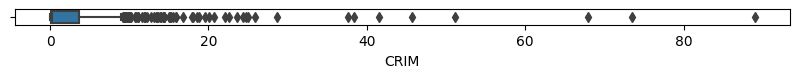

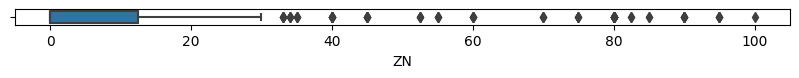

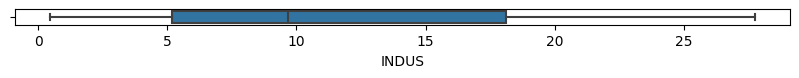

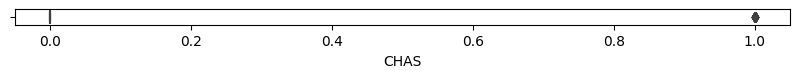

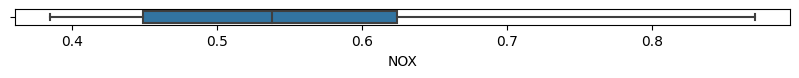

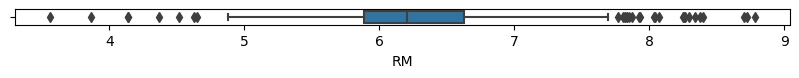

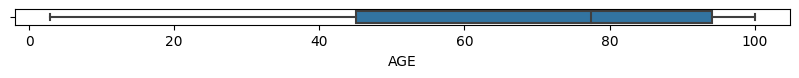

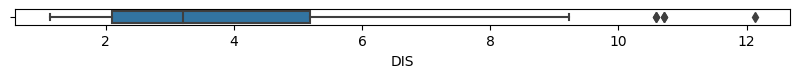

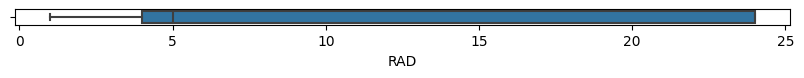

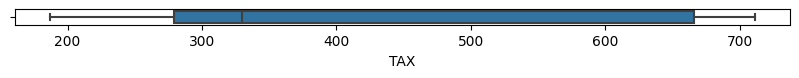

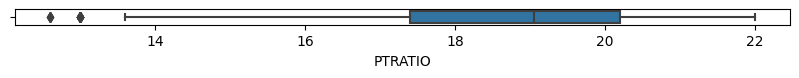

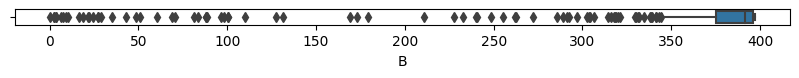

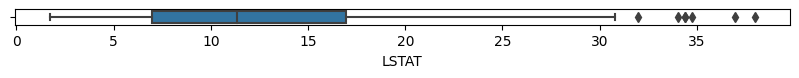

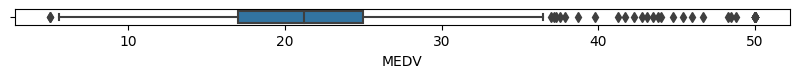

In [ ]:
# Outlier Visual Comparison Before/After (since only Boston housing has detected outlier, I will do it only for that)

# Before, with raw dataset
for column in raw_df_boston:
    plt.figure(figsize = (10, 0.2))
    sns.boxplot(data = raw_df_boston, x = column)


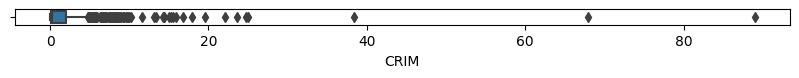

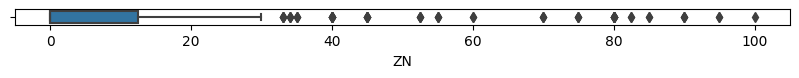

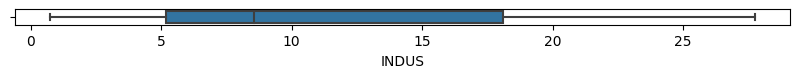

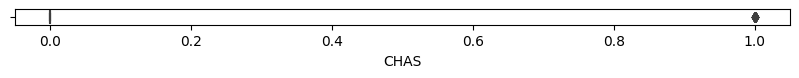

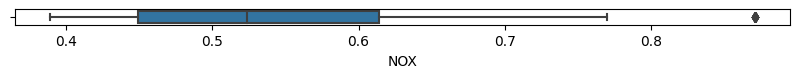

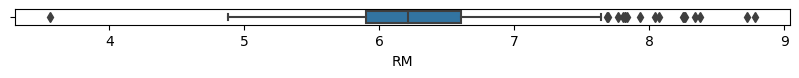

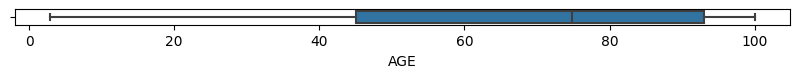

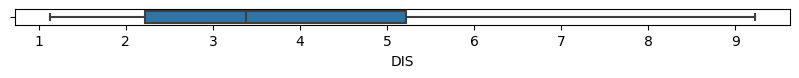

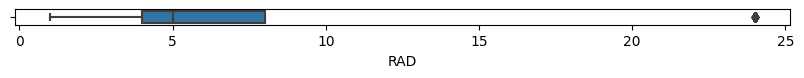

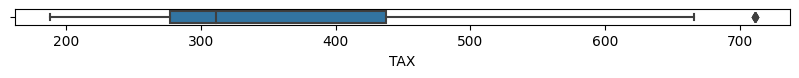

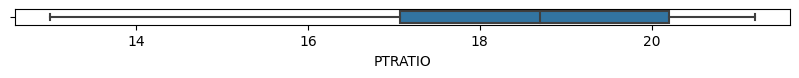

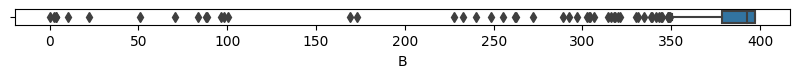

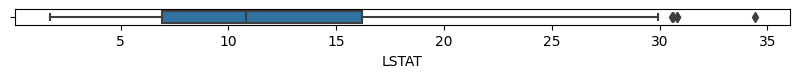

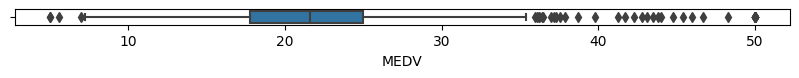

In [ ]:
# After, with outliers removed

for column in df_boston:
    plt.figure(figsize = (10, 0.2))
    sns.boxplot(data = df_boston, x = column)

## Train/test split, data normalization

In [ ]:
# Creating a function for scaling features
# Parameters:
#   - df is the dataframe
#   - col is a list containing the names of the columns
# Return the standardized dataframe
def standard_scalar_function(df, col):
    for feature in col:
        feature_mean = df[feature].mean()  # Compute the mean of the column
        feature_std = df[feature].std()    # Compute the standard deviation of the column

        # Apply the standardization formula to every element in the column
        standardize = lambda x: (x - feature_mean) / feature_std
        df[feature] = df[feature].apply(standardize)
    return df

In [ ]:
# Train/test split (80/20 split) => BOSTON housing section
# We are allowed to use sklearn's train_test_split function
# as mentioned on this thread: https://edstem.org/us/courses/45550/discussion/3499374

# Boston Data train/test split
X_boston = df_boston.drop(columns = 'MEDV', axis = 1) # Separate input features from output
Y_boston = df_boston['MEDV']

X_train_boston, X_test_boston, y_train_boston, y_test_boston = train_test_split(X_boston, Y_boston, test_size = 0.2, random_state = 20)

# Not normalized data, useful later when comparing it to model feeded with normal data
X_train_boston_non_normal = X_train_boston.to_numpy()
X_test_boston_non_normal = X_test_boston.to_numpy()
y_train_boston_non_normal = y_train_boston.to_numpy()
y_test_boston_non_normal = y_test_boston.to_numpy()

print(X_train_boston.shape)
print(y_train_boston.shape)
print(X_test_boston.shape)
print(y_test_boston.shape)

# Scale/Standardize the data --> make sure to do train/test separately so as to not contaminate the datasets
X_scaled_train_boston = standard_scalar_function(X_train_boston.copy(), X_train_boston.columns)
X_scaled_test_boston = standard_scalar_function(X_test_boston.copy(), X_test_boston.columns)

# convert df to numpy array
X_train_boston =  X_scaled_train_boston.to_numpy()
y_train_boston =  y_train_boston.to_numpy()
X_test_boston =  X_scaled_test_boston.to_numpy()
y_test_boston =  y_test_boston.to_numpy()

(363, 13)
(363,)
(91, 13)
(91,)


In [ ]:
# Train/test split (80/20 split) => WINE section
# We are allowed to use sklearn's train_test_split function
# as mentioned on this thread: https://edstem.org/us/courses/45550/discussion/3499374

# Wine Data train/test split
X_wine = df_wine.drop(columns = 'class', axis = 1) # Separate input features from output
Y_wine = df_wine['class']

Xw_train, Xw_test, yw_train, yw_test = train_test_split(X_wine, Y_wine, test_size = 0.2, random_state = 20)

# Not normalized data, useful later when comparing it to model feeded with normal data
Xw_train_non_normal = Xw_train.to_numpy()
Xw_test_non_normal = Xw_test.to_numpy()
yw_train_non_normal = yw_train.to_numpy()
yw_test_non_normal = yw_test.to_numpy()

# Scale/Standardize the data --> make sure to do train/test separately so as to not contaminate the datasets
Xw_train = standard_scalar_function(Xw_train.copy(), Xw_train.columns)
Xw_test = standard_scalar_function(Xw_test.copy(), Xw_test.columns)

# convert df to numpy array
Xw_train =  Xw_train.to_numpy()
yw_train =  yw_train.to_numpy()
Xw_test =  Xw_test.to_numpy()
yw_test =  yw_test.to_numpy()

## Boston Housing Training

In [ ]:
# Analytical linear regression training set performance
model = LinearRegression()
loss, weights = model.fit(X_train_boston, y_train_boston)
print(loss)

18.677467830616774


In [ ]:
# Analytical linear regression testing set performance (will be tuned later)
out = model.predict(X_test_boston)
mse = np.mean((y_test_boston - out) ** 2)
print(mse)

28.96786288023232


iteration 0: loss 594.724080
iteration 100: loss 139.986664
iteration 200: loss 27.673254
iteration 300: loss 9.727449
iteration 400: loss 20.212199


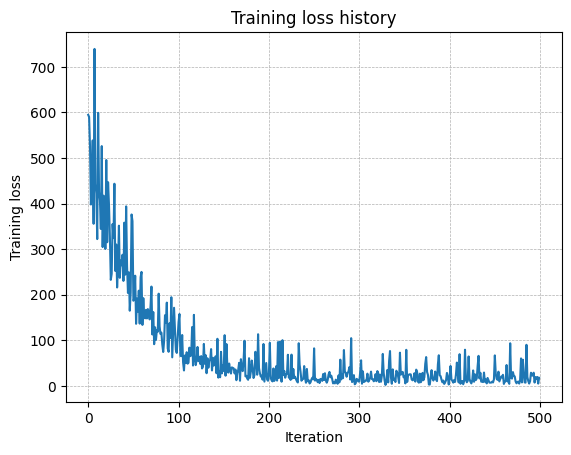

In [ ]:
model = SGD('linear')
loss_history = model.fit(X_train_boston, y_train_boston, max_iters=500, verbose=True, reg=0.1)

plt.plot(loss_history)
plt.title("Training loss history")
plt.xlabel("Iteration")
plt.ylabel("Training loss")
plt.grid(linestyle='--', linewidth=0.5)
plt.show()

iteration 0: loss 697.047298
iteration 100: loss 117.273580
iteration 200: loss 12.121870
iteration 300: loss 9.664061
iteration 400: loss 70.467604


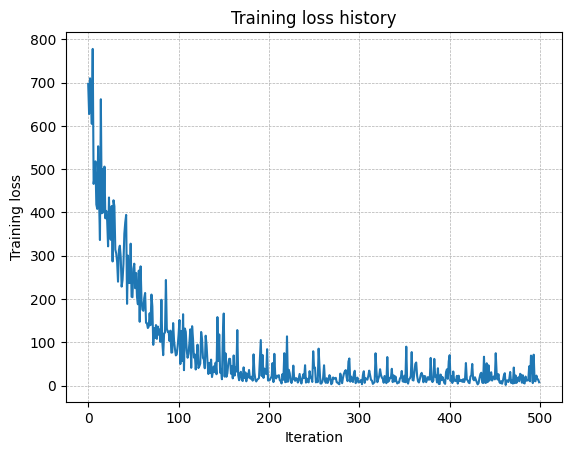

In [ ]:
model = Momentum('linear')
loss_history = model.fit(X_train_boston, y_train_boston, max_iters=500, verbose=True)

plt.plot(loss_history)
plt.title("Training loss history")
plt.xlabel("Iteration")
plt.ylabel("Training loss")
plt.grid(linestyle='--', linewidth=0.5)
plt.show()

In [ ]:
# 5-fold cross validation for Linear Regression
num_folds = 5
Xw_train_folds = np.array_split(X_train_boston, num_folds)
yw_train_folds = np.array_split(y_train_boston, num_folds)
results = {}

for i in range(num_folds):
    Xw_train_temp = np.concatenate(np.compress(np.arange(num_folds) != i, Xw_train_folds, axis=0))
    yw_train_temp = np.concatenate(np.compress(np.arange(num_folds) != i, yw_train_folds, axis=0))

    model = LinearRegression()
    model.fit(Xw_train_temp, yw_train_temp)
    y_train_pred = model.predict(Xw_train_temp)
    y_val_pred = model.predict(Xw_train_folds[i])
    y_test_pred = model.predict(X_test_boston)

    train_mse = np.mean((yw_train_temp - y_train_pred) ** 2)
    val_mse = np.mean((yw_train_folds[i] - y_val_pred) ** 2)
    test_mse = np.mean((y_test_boston - y_test_pred) ** 2)

    results[i] = (train_mse, val_mse, test_mse)

In [ ]:
# Convert the data into a NumPy array
mse_array = np.array(list(results.values()))

# Calculate the mean for each column
means= np.mean(mse_array, axis=0)

# Print the column means
print(means)

[18.42709474 20.99187711 29.25264877]


In [ ]:
# Hyperparameter tuning for Linear Regression with SDG

num_folds = 5
Xw_train_folds = np.array_split(X_train_boston, num_folds)
yw_train_folds = np.array_split(y_train_boston, num_folds)

results = {}
best_test = np.inf
best_softmax = None

learning_rates = np.linspace(1e-2, 1e-5, 20)

for lr in learning_rates:
  error_val = 0
  for i in range(num_folds):
    Xw_train_temp = np.concatenate(np.compress(np.arange(num_folds) != i, Xw_train_folds, axis=0))
    yw_train_temp = np.concatenate(np.compress(np.arange(num_folds) != i, yw_train_folds, axis=0))

    model = SGD('linear')
    model.fit(Xw_train_temp, yw_train_temp, max_iters=500, learning_rate=lr, verbose=False)
    y_train_pred = model.predict(Xw_train_temp)
    y_val_pred = model.predict(Xw_train_folds[i])
    y_test_pred = model.predict(X_test_boston)

    train_mse = np.mean((yw_train_temp - y_train_pred) ** 2)
    val_mse = np.mean((yw_train_folds[i] - y_val_pred) ** 2)
    test_mse = np.mean((y_test_boston - y_test_pred) ** 2)

    results[(lr, i)] = (train_mse, val_mse, test_mse)

  val_mse_avg = val_mse / num_folds
  if val_mse_avg < best_test:
    best_test = val_mse_avg
    best_lr = lr
    best_model = model

# Print out results.
for lr, i in sorted(results):
  train_mse, test_mse, val_mse = results[(lr, i)]
  print('lr %e train MSE: %f test MSE: %f val MSE: %f' % (
              lr, train_mse, test_mse, val_mse))

print('best average validation mean squared error achieved during cross-validation: %f, with learning rate %f' % (best_test, best_lr))

In [ ]:
yb_pred1 = best_model.predict(X_train_boston)
mse_train = np.mean((y_train_boston - yb_pred1) ** 2)
print(mse_train)

yb_pred2 = best_model.predict(X_test_boston)
mse_test = np.mean((y_test_boston - yb_pred2) ** 2)
print(mse_test)

20.257931632423524
29.789334300429122


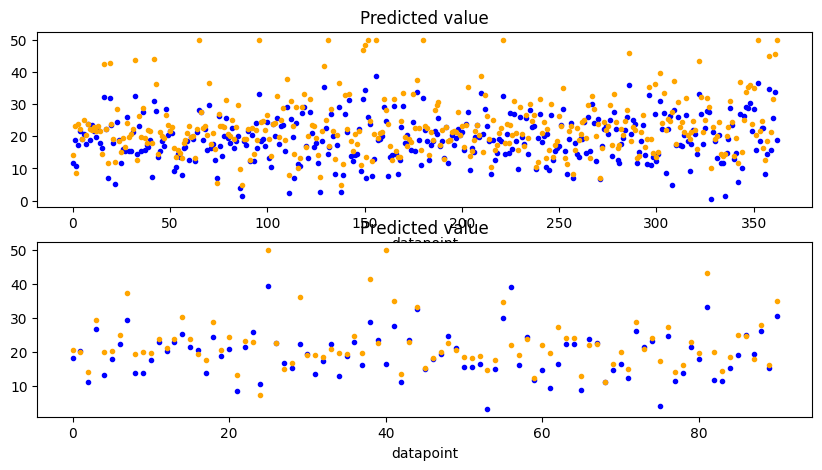

In [ ]:
yb_pred1 = best_model.predict(X_train_boston)
yb_pred2 = best_model.predict(X_test_boston)

fig, axes = plt.subplots(2, figsize = (10, 5))

axes[0].scatter(np.arange(len(yb_pred1)), yb_pred1, marker='.', color='b')
axes[0].scatter(np.arange(len(y_train_boston)), y_train_boston, marker='.', color='orange')

axes[1].scatter(np.arange(len(yb_pred2)), yb_pred2, marker='.', color='b')
axes[1].scatter(np.arange(len(y_test_boston)), y_test_boston, marker='.', color='orange')

axes[0].set(xlabel = f"datapoint", title = f"Predicted value")
axes[1].set(xlabel = f"datapoint", title = f"Predicted value")

plt.show()

## Wine Classification Training

In [ ]:
def F1_score(model, X_test, y_test):
  TP = {'1': 0, '2': 0, '3': 0}
  TN = {'1': 0, '2': 0, '3': 0}
  FP = {'1': 0, '2': 0, '3': 0}
  FN = {'1': 0, '2': 0, '3': 0}
  y_pred = model.predict(X_test).astype(int)
  y_test = y_test.astype(int)

  for i in range(len(y_pred)):
    if y_pred[i] == y_test[i]:
      TP[str(y_test[i])] += 1
      for j in list(TP.keys()):
        if j != str(y_test[i]):
          TN[str(j)] += 1
    if y_pred[i] != y_test[i]:
      FN[str(y_test[i])] += 1
      FP[str(y_pred[i])] += 1

  TP = np.array(list(TP.values()))
  TN = np.array(list(TN.values()))
  FP = np.array(list(FP.values()))
  FN = np.array(list(FN.values()))
  RP = TP.sum() + FP.sum()
  P = TP.sum() + FN.sum()
  N = TN.sum() + FP.sum()
  accuracy = (TP.sum() + TN.sum()) / (P + N)
  precision = TP.sum() / RP
  recall = TP.sum() / P
  F1_score = 2 * precision * recall / (precision + recall)

  return (accuracy, precision, recall, F1_score)

iteration 100: loss 0.935239
iteration 200: loss 0.814164
iteration 300: loss 0.724848
iteration 400: loss 0.658019
iteration 500: loss 0.607168
iteration 600: loss 0.567816
iteration 700: loss 0.536880
iteration 800: loss 0.512211
iteration 900: loss 0.492290
iteration 1000: loss 0.476022
iteration 1100: loss 0.462605
iteration 1200: loss 0.451441
iteration 1300: loss 0.442080
iteration 1400: loss 0.434174
iteration 1500: loss 0.427456
iteration 1600: loss 0.421713
iteration 1700: loss 0.416779
iteration 1800: loss 0.412519
iteration 1900: loss 0.408825
iteration 2000: loss 0.405608
iteration 2100: loss 0.402797
iteration 2200: loss 0.400330
iteration 2300: loss 0.398158
iteration 2400: loss 0.396241
iteration 2500: loss 0.394542
iteration 2600: loss 0.393033
iteration 2700: loss 0.391688
iteration 2800: loss 0.390487
iteration 2900: loss 0.389411
iteration 3000: loss 0.388445
iteration 3100: loss 0.387575
iteration 3200: loss 0.386790
iteration 3300: loss 0.386080
iteration 3400: los

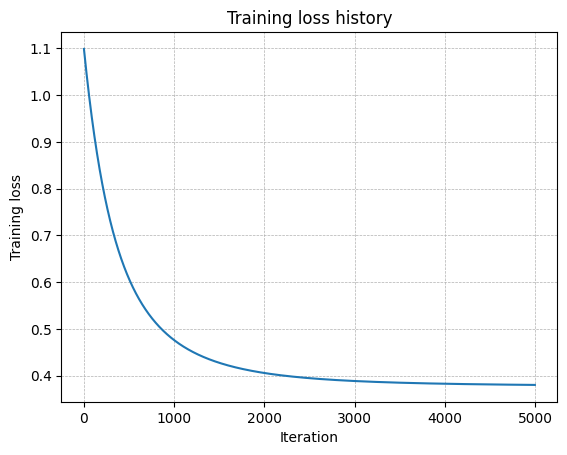

In [ ]:
# Logistic Regression with Gradient Descent
model = LogisticRegression()

loss_history = model.fit(Xw_train, yw_train, max_iters=5000, eps=1e-7, learning_rate=1e-3, verbose=True, reg=0.1)

plt.plot(loss_history)
plt.title("Training loss history")
plt.xlabel("Iteration")
plt.ylabel("Training loss")
plt.grid(linestyle='--', linewidth=0.5)
plt.show()

In [ ]:
print(F1_score(model, Xw_train, yw_train))
print(F1_score(model, Xw_test, yw_test))

(0.9904306220095693, 0.9857142857142858, 0.9857142857142858, 0.9857142857142858)
(0.9813084112149533, 0.9722222222222222, 0.9722222222222222, 0.9722222222222222)


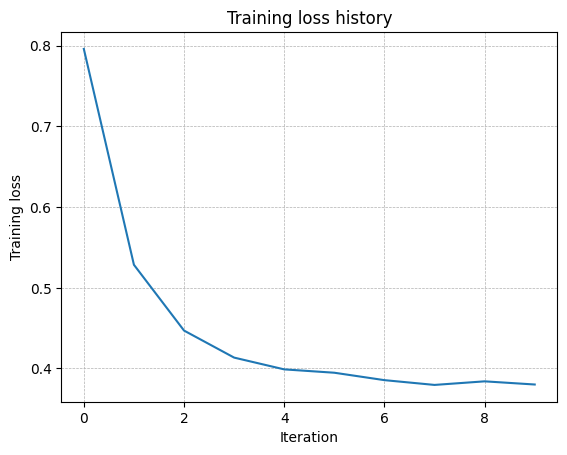

In [ ]:
# Mini-batch Stochastic Gradient Descent
model = SGD('logistic')
loss_history = model.fit(Xw_train, yw_train, max_iters=5000, eps=1e-7, learning_rate=1e-3, verbose=False, reg=0.1)

# plt.plot(loss_history)
plt.plot(np.array(loss_history).reshape(-1, 500).mean(1))     # smoother plot
plt.title("Training loss history")
plt.xlabel("Iteration")
plt.ylabel("Training loss")
plt.grid(linestyle='--', linewidth=0.5)
plt.show()

In [ ]:
print(F1_score(model, Xw_train, yw_train))
print(F1_score(model, Xw_test, yw_test))

(0.9904306220095693, 0.9857142857142858, 0.9857142857142858, 0.9857142857142858)
(0.9813084112149533, 0.9722222222222222, 0.9722222222222222, 0.9722222222222222)


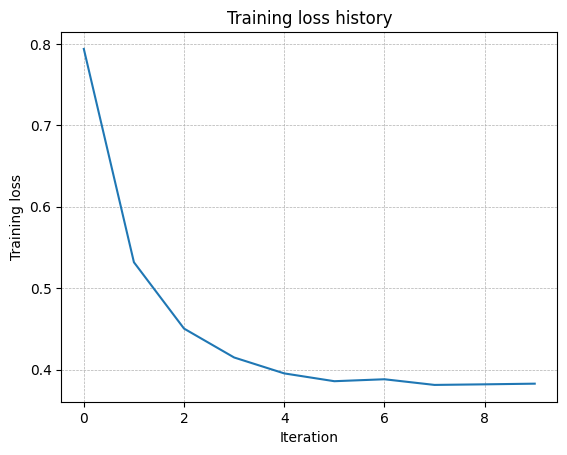

In [ ]:
# Mini-batch Stochastic Gradient Descent
model = SGD('logistic')
loss_history = model.fit(Xw_train, yw_train, max_iters=5000, eps=1e-7, learning_rate=1e-3, verbose=False, reg=0.1)

# plt.plot(loss_history)
plt.plot(np.array(loss_history).reshape(-1, 500).mean(1))     # smoother plot
plt.title("Training loss history")
plt.xlabel("Iteration")
plt.ylabel("Training loss")
plt.grid(linestyle='--', linewidth=0.5)
plt.show()

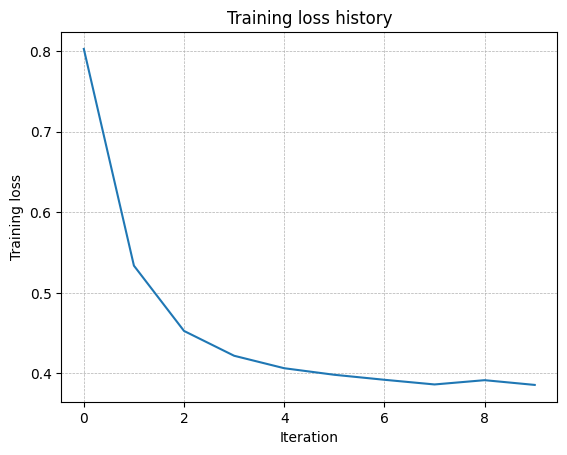

In [ ]:
# Mini-batch Gradient Descent with Momentum
model = Momentum('logistic')
loss_history = model.fit(Xw_train, yw_train, max_iters=5000, eps=1e-7, learning_rate=1e-3, verbose=False, reg=0.1)

# plt.plot(loss_history)
plt.plot(np.array(loss_history).reshape(-1, 500).mean(1))     # smoother plot
plt.title("Training loss history")
plt.xlabel("Iteration")
plt.ylabel("Training loss")
plt.grid(linestyle='--', linewidth=0.5)
plt.show()

In [ ]:
print(F1_score(model, Xw_train, yw_train))
print(F1_score(model, Xw_test, yw_test))

(0.9904306220095693, 0.9857142857142858, 0.9857142857142858, 0.9857142857142858)
(0.9813084112149533, 0.9722222222222222, 0.9722222222222222, 0.9722222222222222)


In [ ]:
# 5-fold cross validation for Linear Regression
num_folds = 5
Xw_train_folds = np.array_split(Xw_train, num_folds)
yw_train_folds = np.array_split(yw_train, num_folds)
results = {}

for i in range(num_folds):
    Xw_train_temp = np.concatenate(np.compress(np.arange(num_folds) != i, Xw_train_folds, axis=0))
    yw_train_temp = np.concatenate(np.compress(np.arange(num_folds) != i, yw_train_folds, axis=0))

    model = LogisticRegression()
    model.fit(Xw_train_temp, yw_train_temp, max_iters=5000, learning_rate=1e-3, eps=1e-7, reg=1e-5, verbose=False)
    y_train_pred = model.predict(Xw_train_temp)
    y_val_pred = model.predict(Xw_train_folds[i])
    y_test_pred = model.predict(Xw_test)

    train_accuracy = np.mean(yw_train_temp == y_train_pred)
    val_accuracy = np.mean(yw_train_folds[i] == y_val_pred)
    test_accuracy = np.mean(yw_test == y_test_pred)
    error_val += np.mean((y_val_pred - yw_train_folds[i]) ** 2)
    results[i] = (train_accuracy, val_accuracy, test_accuracy, error_val)

In [ ]:
# Convert the data into a NumPy array
accuracy_array = np.array(list(results.values()))

# Calculate the mean for each column
accuracy = np.mean(accuracy_array, axis=0)

# Print the column means
print(accuracy)

[0.98214286 0.95714286 0.96666667 1.08571429]


In [ ]:
# Hyperparameter tuning for Logistic Regression
# 5-fold cross validation

num_folds = 5
Xw_train_folds = np.array_split(Xw_train, num_folds)
yw_train_folds = np.array_split(yw_train, num_folds)

results = {}
best_test = np.inf
best_softmax = None

learning_rates = np.linspace(1e-2, 1e-5, 20)

for lr in learning_rates:
  error_val = 0
  for i in range(num_folds):
    Xw_train_temp = np.concatenate(np.compress(np.arange(num_folds) != i, Xw_train_folds, axis=0))
    yw_train_temp = np.concatenate(np.compress(np.arange(num_folds) != i, yw_train_folds, axis=0))

    model = LogisticRegression()
    model.fit(Xw_train_temp, yw_train_temp, max_iters=5000, eps=1e-7, reg=1e-5, learning_rate=lr, verbose=False)
    y_train_pred = model.predict(Xw_train_temp)
    y_val_pred = model.predict(Xw_train_folds[i])
    y_test_pred = model.predict(Xw_test)

    train_accuracy = np.mean(yw_train_temp == y_train_pred)
    val_accuracy = np.mean(yw_train_folds[i] == y_val_pred)
    test_accuracy = np.mean(yw_test == y_test_pred)
    error_val += np.mean((y_val_pred - yw_train_folds[i]) ** 2)
    results[(lr, i)] = (train_accuracy, val_accuracy, test_accuracy, error_val)

  error_val_avg = error_val / num_folds
  if error_val_avg < best_test:
    best_test = error_val_avg
    best_lr = lr
    best_model = model

# Print out results.
for lr, i in sorted(results):
  train_accuracy, test_accuracy, val_accuracy, error_val = results[(lr, i)]
  print('lr %e train accuracy: %f test accuracy: %f val accuracy: %f avg val error: %f' % (
              lr, train_accuracy, test_accuracy, val_accuracy, error_val))

print('best average validation error achieved during cross-validation: %f, with learning rate %f' % (best_test, best_lr))

lr 1.000000e-05 train accuracy: 0.964286 test accuracy: 0.928571 val accuracy: 0.916667 avg val error: 0.071429
lr 1.000000e-05 train accuracy: 0.919643 test accuracy: 0.928571 val accuracy: 0.944444 avg val error: 0.142857
lr 1.000000e-05 train accuracy: 0.937500 test accuracy: 0.892857 val accuracy: 0.916667 avg val error: 0.250000
lr 1.000000e-05 train accuracy: 0.973214 test accuracy: 0.892857 val accuracy: 0.916667 avg val error: 0.357143
lr 1.000000e-05 train accuracy: 0.919643 test accuracy: 1.000000 val accuracy: 0.916667 avg val error: 0.357143
lr 5.357895e-04 train accuracy: 0.973214 test accuracy: 0.964286 val accuracy: 0.972222 avg val error: 0.035714
lr 5.357895e-04 train accuracy: 0.982143 test accuracy: 1.000000 val accuracy: 0.972222 avg val error: 0.035714
lr 5.357895e-04 train accuracy: 0.982143 test accuracy: 0.964286 val accuracy: 0.972222 avg val error: 0.071429
lr 5.357895e-04 train accuracy: 0.991071 test accuracy: 0.928571 val accuracy: 0.972222 avg val error: 0

In [ ]:
yw_pred1 = best_model.predict(Xw_train)
yw_pred2 = best_model.predict(Xw_test)
print('Train: ', np.sum(yw_pred1 == yw_train), '/', yw_pred1.shape[0], '\n Test:', np.sum(yw_pred2 == yw_test), '/', yw_pred2.shape[0])

Train:  138 / 140 
 Test: 35 / 36


In [ ]:
print(F1_score(best_model, Xw_train, yw_train))
print(F1_score(best_model, Xw_test, yw_test))

(0.9904306220095693, 0.9857142857142858, 0.9857142857142858, 0.9857142857142858)
(0.9813084112149533, 0.9722222222222222, 0.9722222222222222, 0.9722222222222222)


In [ ]:
# Hyperparameter tuning Logistic Regression with SGD
# 5-fold cross validation

num_folds = 5
Xw_train_folds = np.array_split(Xw_train, num_folds)
yw_train_folds = np.array_split(yw_train, num_folds)

results = {}
best_test = np.inf
best_softmax = None

learning_rates = np.linspace(1e-2, 1e-5, 20)

for lr in learning_rates:
  error_val = 0
  for i in range(num_folds):
    Xw_train_temp = np.concatenate(np.compress(np.arange(num_folds) != i, Xw_train_folds, axis=0))
    yw_train_temp = np.concatenate(np.compress(np.arange(num_folds) != i, yw_train_folds, axis=0))

    model = SGD("logistic")
    model.fit(Xw_train_temp, yw_train_temp, max_iters=5000, eps=1e-7, reg=1e-5, learning_rate=lr, verbose=False)
    y_train_pred = model.predict(Xw_train_temp)
    y_val_pred = model.predict(Xw_train_folds[i])
    y_test_pred = model.predict(Xw_test)

    train_accuracy = np.mean(yw_train_temp == y_train_pred)
    val_accuracy = np.mean(yw_train_folds[i] == y_val_pred)
    test_accuracy = np.mean(yw_test == y_test_pred)
    error_val += np.mean((y_val_pred - yw_train_folds[i]) ** 2)
    results[(lr, i)] = (train_accuracy, val_accuracy, test_accuracy, error_val)

  error_val_avg = error_val / num_folds
  if error_val_avg < best_test:
    best_test = error_val_avg
    best_lr = lr
    best_model = model

# Print out results.
for lr, i in sorted(results):
  train_accuracy, test_accuracy, val_accuracy, error_val = results[(lr, i)]
  print('lr %e train accuracy: %f test accuracy: %f val accuracy: %f avg val error: %f' % (
              lr, train_accuracy, test_accuracy, val_accuracy, error_val))

print('best average validation error achieved during cross-validation: %f, with learning rate %f' % (best_test, best_lr))

In [ ]:
yw_pred1 = best_model.predict(Xw_train)
yw_pred2 = best_model.predict(Xw_test)
print('Train: ', np.sum(yw_pred1 == yw_train), '/', yw_pred1.shape[0], '\n Test:', np.sum(yw_pred2 == yw_test), '/', yw_pred2.shape[0])

Train:  140 / 140 
 Test: 35 / 36


In [ ]:
print(F1_score(best_model, Xw_train, yw_train))
print(F1_score(best_model, Xw_test, yw_test))

(1.0, 1.0, 1.0, 1.0)
(0.9813084112149533, 0.9722222222222222, 0.9722222222222222, 0.9722222222222222)


In [ ]:
# Hyperparameter tuning for SGD Logistic Regression with Momentum
# 5-fold cross validation

num_folds = 5
Xw_train_folds = np.array_split(Xw_train, num_folds)
yw_train_folds = np.array_split(yw_train, num_folds)

results = {}
best_test = np.inf
best_softmax = None

learning_rates = np.linspace(1e-2, 1e-5, 20)

for lr in learning_rates:
  error_val = 0
  for i in range(num_folds):
    Xw_train_temp = np.concatenate(np.compress(np.arange(num_folds) != i, Xw_train_folds, axis=0))
    yw_train_temp = np.concatenate(np.compress(np.arange(num_folds) != i, yw_train_folds, axis=0))

    model = Momentum("logistic")
    model.fit(Xw_train_temp, yw_train_temp, max_iters=5000, learning_rate=lr, verbose=False)
    y_train_pred = model.predict(Xw_train_temp)
    y_val_pred = model.predict(Xw_train_folds[i])
    y_test_pred = model.predict(Xw_test)

    train_accuracy = np.mean(yw_train_temp == y_train_pred)
    val_accuracy = np.mean(yw_train_folds[i] == y_val_pred)
    test_accuracy = np.mean(yw_test == y_test_pred)
    error_val += np.mean((y_val_pred - yw_train_folds[i]) ** 2)
    results[(lr, i)] = (train_accuracy, val_accuracy, test_accuracy, error_val)

  error_val_avg = error_val / num_folds
  if error_val_avg < best_test:
    best_test = error_val_avg
    best_lr = lr
    best_model = model

# Print out results.
for lr, i in sorted(results):
  train_accuracy, test_accuracy, val_accuracy, error_val = results[(lr, i)]
  print('lr %e train accuracy: %f test accuracy: %f val accuracy: %f avg val error: %f' % (
              lr, train_accuracy, test_accuracy, val_accuracy, error_val))

print('best average validation error achieved during cross-validation: %f, with learning rate %f' % (best_test, best_lr))

lr 1.000000e-05 train accuracy: 0.964286 test accuracy: 0.928571 val accuracy: 0.888889 avg val error: 0.071429
lr 1.000000e-05 train accuracy: 0.919643 test accuracy: 0.928571 val accuracy: 0.944444 avg val error: 0.142857
lr 1.000000e-05 train accuracy: 0.937500 test accuracy: 0.892857 val accuracy: 0.916667 avg val error: 0.250000
lr 1.000000e-05 train accuracy: 0.964286 test accuracy: 0.892857 val accuracy: 0.916667 avg val error: 0.357143
lr 1.000000e-05 train accuracy: 0.919643 test accuracy: 1.000000 val accuracy: 0.916667 avg val error: 0.357143
lr 5.357895e-04 train accuracy: 0.973214 test accuracy: 0.964286 val accuracy: 0.972222 avg val error: 0.035714
lr 5.357895e-04 train accuracy: 0.982143 test accuracy: 1.000000 val accuracy: 0.972222 avg val error: 0.035714
lr 5.357895e-04 train accuracy: 0.982143 test accuracy: 0.964286 val accuracy: 0.972222 avg val error: 0.071429
lr 5.357895e-04 train accuracy: 1.000000 test accuracy: 0.928571 val accuracy: 0.972222 avg val error: 0

In [ ]:
yw_pred1 = best_model.predict(Xw_train)
yw_pred2 = best_model.predict(Xw_test)
print('Train: ', np.sum(yw_pred1 == yw_train), '/', yw_pred1.shape[0], '\n Test:', np.sum(yw_pred2 == yw_test), '/', yw_pred2.shape[0])

Train:  140 / 140 
 Test: 35 / 36


In [ ]:
print(F1_score(best_model, Xw_train, yw_train))
print(F1_score(best_model, Xw_test, yw_test))

(1.0, 1.0, 1.0, 1.0)
(0.9813084112149533, 0.9722222222222222, 0.9722222222222222, 0.9722222222222222)


## Impact of Dataset Size

In [ ]:
def subset_iteration(X, y, model, model_type):
  N = X.shape[0]
  p = 0.2
  rng = np.random.default_rng()

  # Shuffle the data once
  indices = np.arange(N)
  rng.shuffle(indices)

  loss_histories = []
  p_arr = []

  for i in range(7):
      end = int(p * N)
      subset_indices = indices[:end]
      X_subset = X[subset_indices, :]
      y_subset = y[subset_indices]
      if model_type == "linear":
        loss_history, _ = model.fit(X_subset, y_subset)
      elif model_type == "logistic":
        loss_history = model.fit(X_subset, y_subset, max_iters=200, eps=1e-3, learning_rate=1e-1, verbose=False, reg=1e-5)
        loss_history = loss_history[-1]

      loss_histories.append(loss_history)
      p_arr.append(p)
      p += 0.1
  return (loss_histories, p_arr)

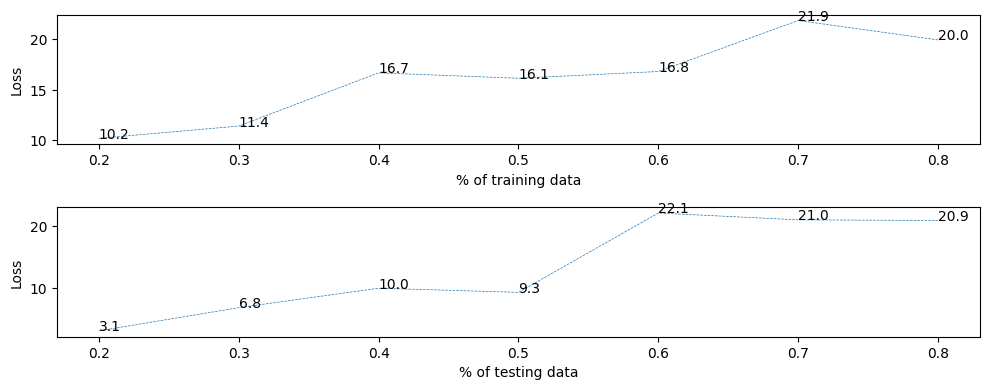

In [ ]:
# Experiment 3: Linear Regression
model = LinearRegression()

fig, axes = plt.subplots(2, figsize = (10, 4))

loss_histories, p_arr = subset_iteration(X_train_boston, y_train_boston, model, 'linear')
axes[0].plot(p_arr, loss_histories, linestyle='--', linewidth=0.5)
for i in range(len(p_arr)):
  axes[0].annotate(round(loss_histories[i], 1), (p_arr[i], loss_histories[i]))
axes[0].set(xlabel = f"% of training data", ylabel = f"Loss")

loss_histories, p_arr = subset_iteration(X_test_boston, y_test_boston, model, 'linear')
axes[1].plot(p_arr, loss_histories, linestyle='--', linewidth=0.5)
for i in range(len(p_arr)):
  axes[1].annotate(round(loss_histories[i], 1), (p_arr[i], loss_histories[i]))
axes[1].set(xlabel = f"% of testing data", ylabel = f"Loss")

fig.tight_layout()
plt.show()

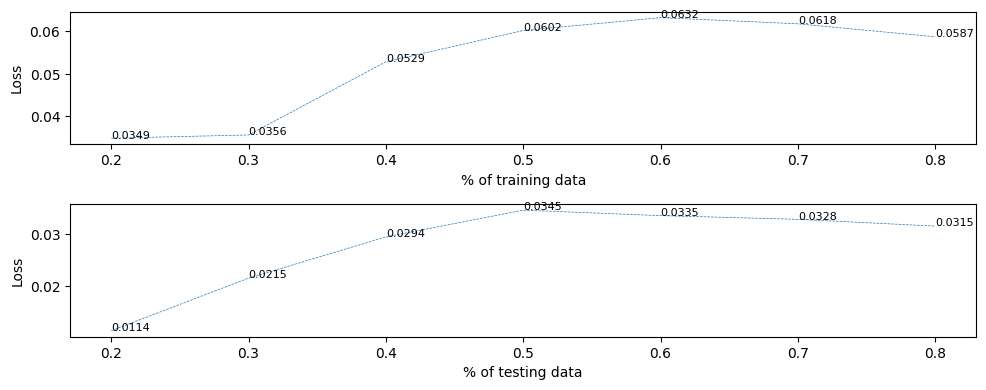

In [ ]:
# Experiment 3: Logistic Regression (Train data)
model = LogisticRegression()
loss_histories, _ = subset_iteration(Xw_train, yw_train, model, 'logistic')

fig, axes = plt.subplots(2, figsize=(10, 4))

loss_histories, p_arr = subset_iteration(Xw_train, yw_train, model, 'logistic')
axes[0].plot(p_arr, loss_histories, linestyle='--', linewidth=0.5)
for i in range(len(p_arr)):
    axes[0].annotate(f"{loss_histories[i]:.4f}", (p_arr[i], loss_histories[i]), fontsize=8)
axes[0].set(xlabel="% of training data", ylabel="Loss")

loss_histories, p_arr = subset_iteration(Xw_test, yw_test, model, 'logistic')
axes[1].plot(p_arr, loss_histories, linestyle='--', linewidth=0.5)
for i in range(len(p_arr)):
    axes[1].annotate(f"{loss_histories[i]:.4f}", (p_arr[i], loss_histories[i]), fontsize=8)
axes[1].set(xlabel="% of testing data", ylabel="Loss")

fig.tight_layout()
plt.show()

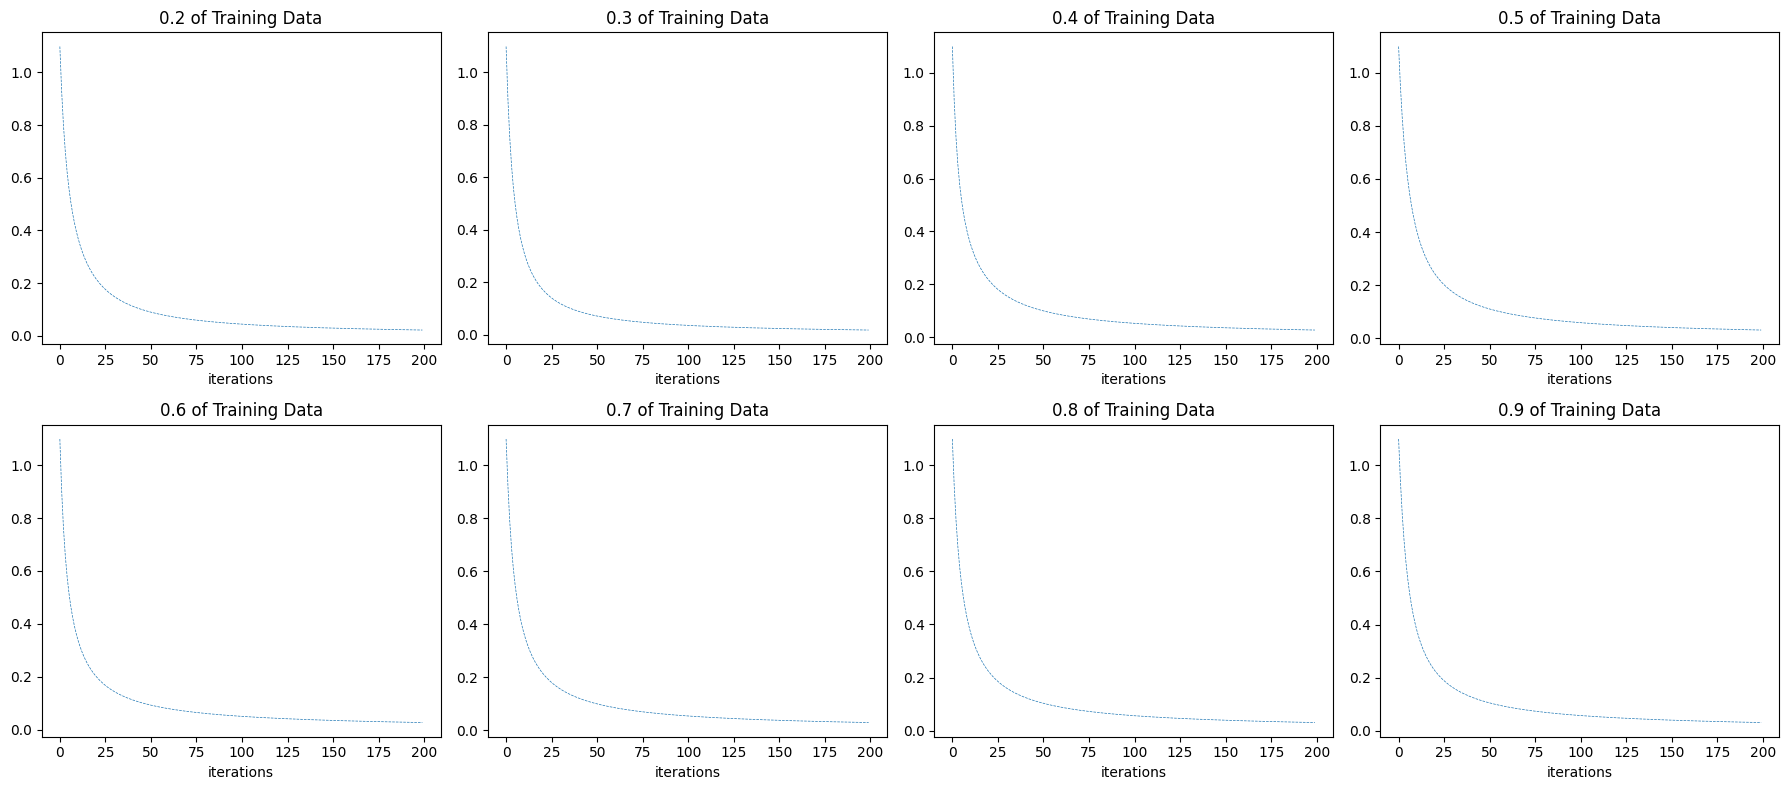

In [ ]:
# Experiment 3: Logistic Regression (Test data)
model = LogisticRegression()
loss_histories, p_arr = subset_iteration(Xw_test, yw_test, model, 'logistic')

fig, axes = plt.subplots(2, 4, figsize = (18, 8))

k = 0
for i in range(2):
  for j in range(4):
    if k == len(loss_histories):
      break
    axes[i, j].plot(loss_histories[k], linestyle='--', linewidth=0.5)
    axes[i, j].set(xlabel = f"iterations", title = f"{round(p_arr[k], 1)} of Training Data")
    k += 1

fig.tight_layout()
plt.show()

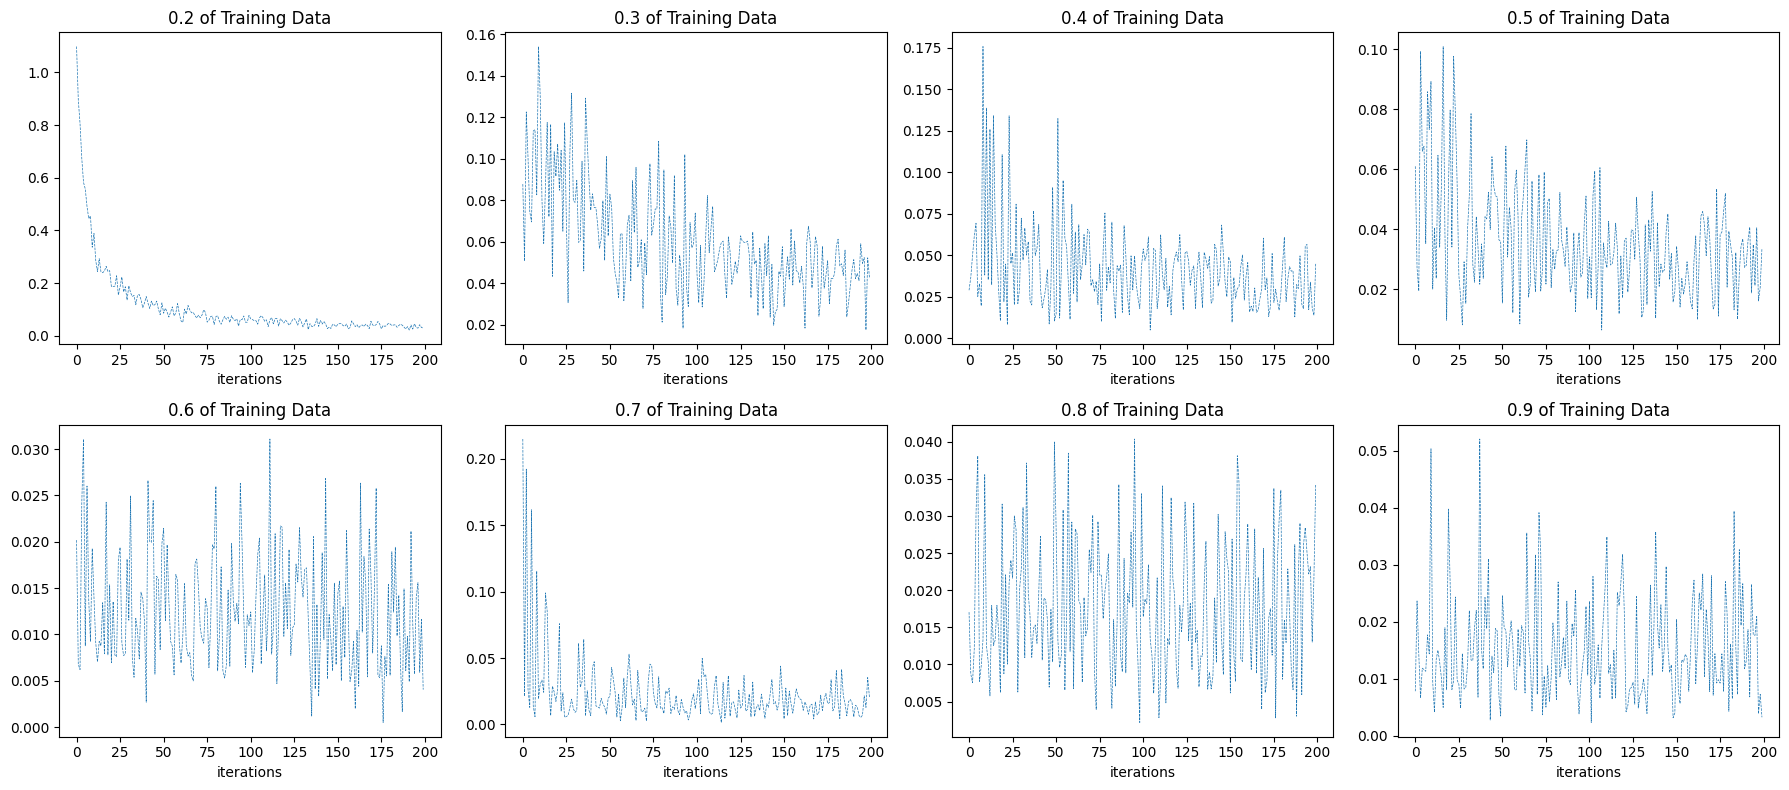

In [ ]:
# Experiment 3: Logistic Regression (Train data)
model = SGD('logistic')
loss_histories, p_arr = subset_iteration(Xw_train, yw_train, model, 'logistic')

fig, axes = plt.subplots(2, 4, figsize = (18, 8))

k = 0
for i in range(2):
  for j in range(4):
    if k == len(loss_histories):
      break
    axes[i, j].plot(loss_histories[k], linestyle='--', linewidth=0.5)
    axes[i, j].set(xlabel = f"iterations", title = f"{round(p_arr[k], 1)} of Training Data")
    k += 1

fig.tight_layout()
plt.show()

## Impact of Mini-batch Size

In [ ]:
def minibatch_iteration(X, y, model, max_iters):
  N = X.shape[0]
  batch_size = 2**3
  loss_histories = []
  for i in range(5):
    loss_history = model.fit(X, y, max_iters=max_iters, eps=1e-7, learning_rate=5e-2, verbose=False, batch_size=batch_size, reg=1e-5)
    batch_size *= 2
    loss_histories.append(loss_history)
  return loss_histories

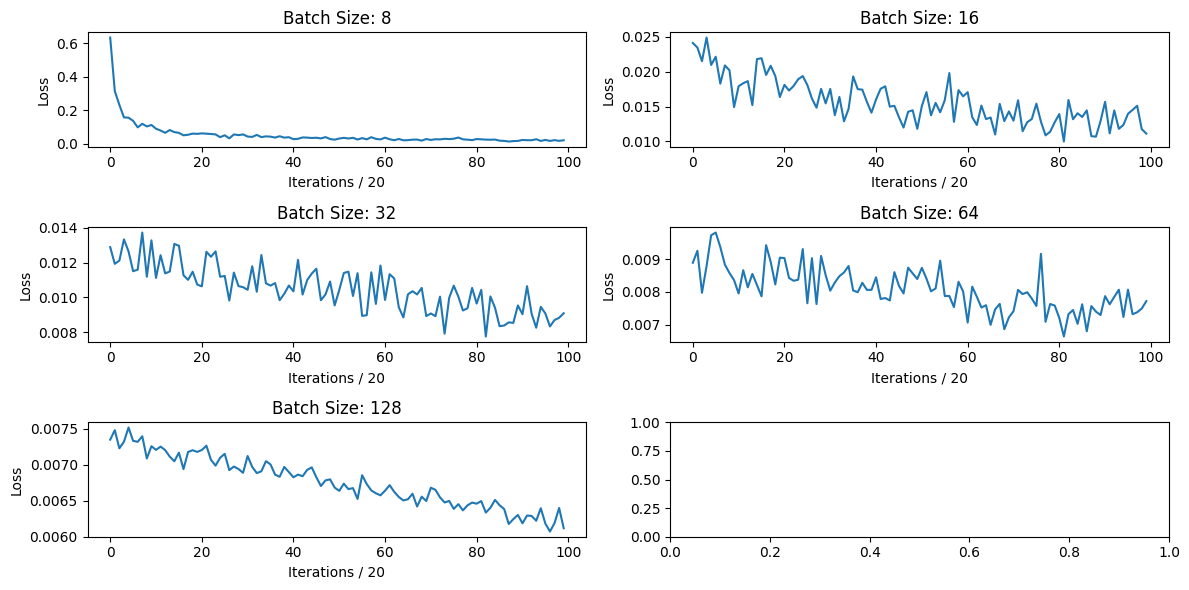

In [ ]:
# Experiment 4: Logistic Regression

model = SGD('logistic')
loss_histories = minibatch_iteration(Xw_train, yw_train, model, max_iters=2000)

fig, axes = plt.subplots(3, 2, figsize=(12, 6))  # Create a 3x2 grid of subplots
batch_sizes = [2**i for i in range(3, 8)]  # List of batch sizes
k = 0

for i in range(3):
    for j in range(2):
        if k == len(loss_histories):
            break
        axes[i, j].plot(np.array(loss_histories[k]).reshape(-1, 20).mean(1))
        axes[i, j].set(xlabel="Iterations / 20", ylabel="Loss", title=f"Batch Size: {batch_sizes[k]}")
        k += 1

fig.tight_layout()
plt.show()

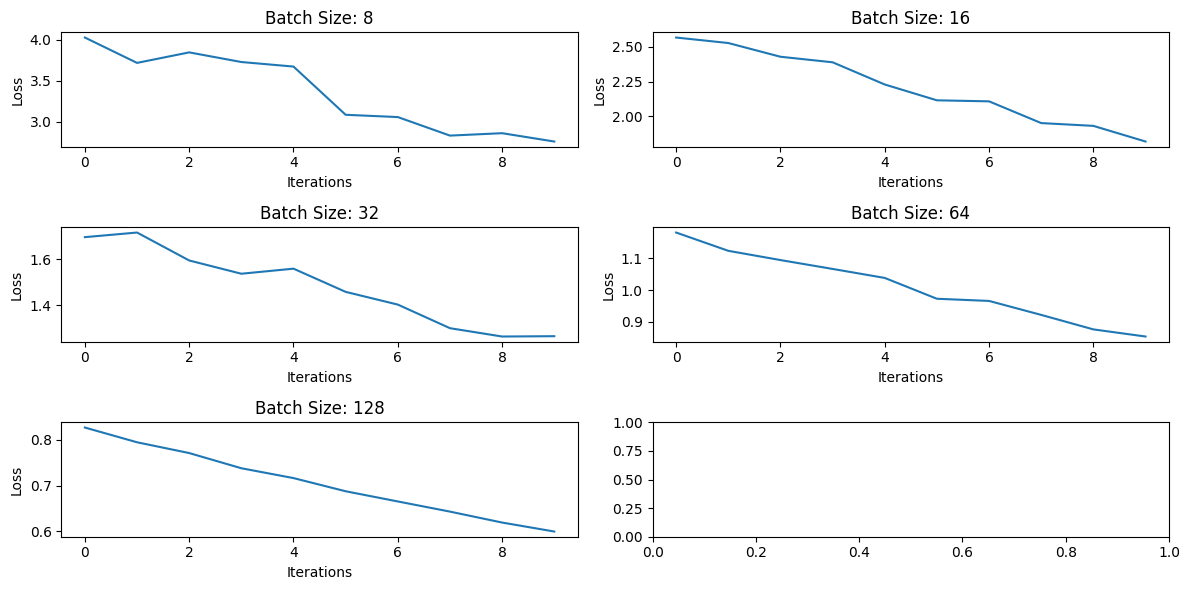

In [ ]:
# Experiment 4: Linear Regression
model = SGD('linear')
loss_histories = minibatch_iteration(Xw_train, yw_train, model, max_iters=200)

fig, axes = plt.subplots(3, 2, figsize=(12, 6))  # Create a 3x2 grid of subplots
batch_sizes = [2**i for i in range(3, 8)]  # List of batch sizes
k = 0

for i in range(3):
    for j in range(2):
        if k == len(loss_histories):
            break
        axes[i, j].plot(np.array(loss_histories[k]).reshape(-1, 20).mean(1))
        axes[i, j].set(xlabel="Iterations", ylabel="Loss", title=f"Batch Size: {batch_sizes[k]}")
        k += 1

fig.tight_layout()
plt.show()

# Performance with different learning rates

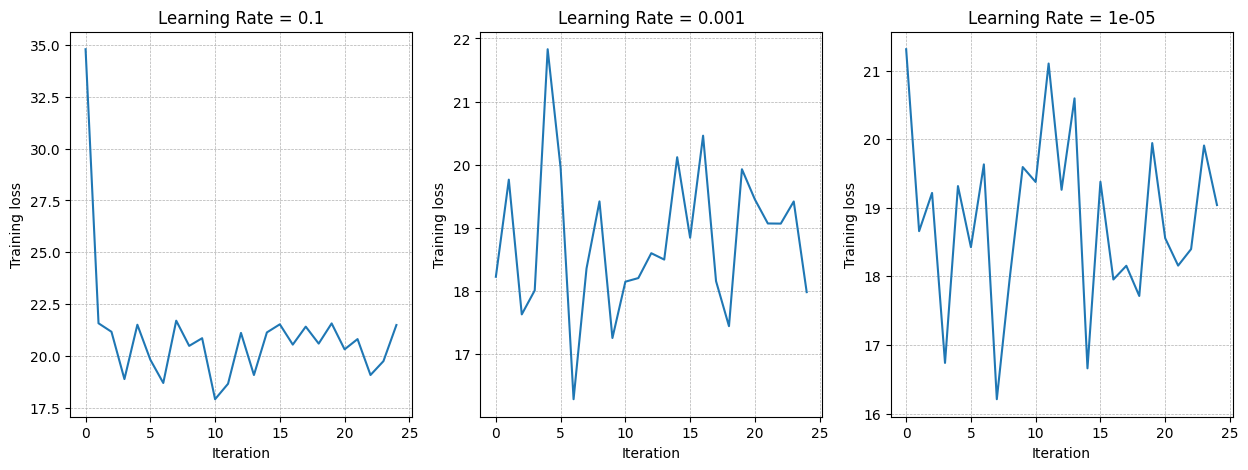

In [ ]:
# Mini-batch gradient descent for Linear Regression
model = SGD('linear')

lrs = [1e-1, 1e-3, 1e-5]

fig, axs = plt.subplots(1, len(lrs), figsize=(15, 5))  # Create subplots in a single row

for i, lr in enumerate(lrs):
    loss_history = model.fit(X_train_boston, y_train_boston, max_iters=5000, learning_rate=lr, verbose=False)
    axs[i].plot(np.array(loss_history).reshape(-1, 200).mean(1))  # make it smoother
    axs[i].set_title(f"Learning Rate = {lr}")
    axs[i].set_xlabel("Iteration")
    axs[i].set_ylabel("Training loss")
    axs[i].grid(linestyle='--', linewidth=0.5)

plt.show()

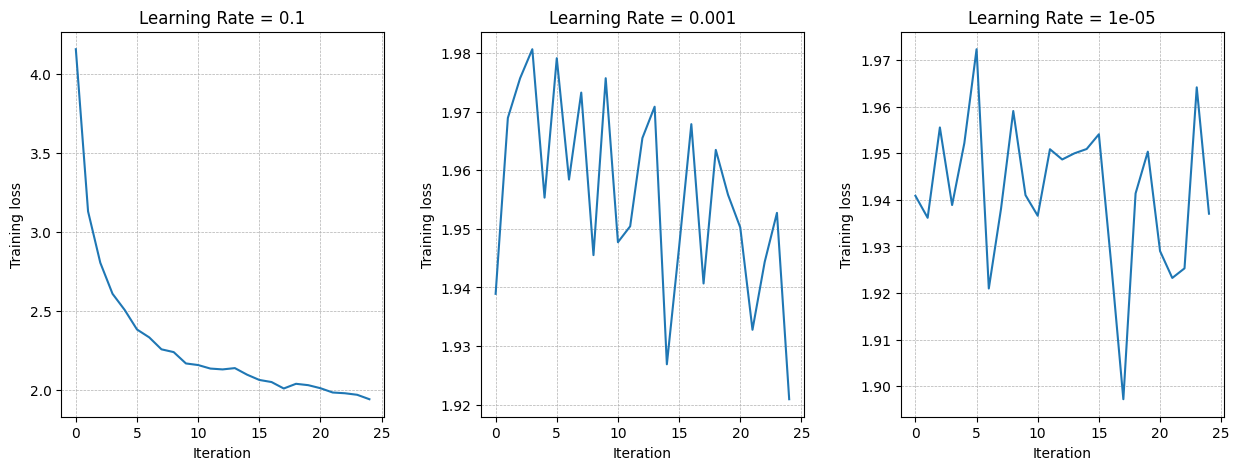

In [ ]:
# Mini-batch gradient descent for Logistic Regression
model = SGD('logistic')

lrs = [1e-1, 1e-3, 1e-5]

fig, axs = plt.subplots(1, len(lrs), figsize=(15, 5))  # Create subplots in a single row, share y-axis
fig.subplots_adjust(wspace=0.3)  # Adjust the horizontal space between subplots

for i, lr in enumerate(lrs):
    loss_history = model.fit(X_train_boston, y_train_boston, max_iters=5000, learning_rate=lr, verbose=False)
    axs[i].plot(np.array(loss_history).reshape(-1, 200).mean(1))  # make it smoother
    axs[i].set_title(f"Learning Rate = {lr}")
    axs[i].set_xlabel("Iteration")
    axs[i].set_ylabel("Training loss")
    axs[i].grid(linestyle='--', linewidth=0.5)

plt.show()

# Gaussian basis function for dataset 1

In [ ]:
def gaussian_basis(x, mean, sigma=1):
    # Calculate the squared Euclidean distance between x and mean
    squared_distance = np.sum((x - mean)**2)

    # Calculate the Gaussian basis function
    phi = np.exp(-squared_distance / (2 * sigma**2))

    return phi

In [ ]:
# Generate random indices to select 5 data points from the training set randomly
selected_indices = np.random.choice(X_train_boston.shape[0], 5, replace=False)

X_train_boston_alt = X_train_boston
num = 0

for index in selected_indices:
  num = num + 1
  feature_values = []

  for data in X_train_boston:
    feature_values.append(gaussian_basis(data, X_train_boston[index], 1))

  new_feature_col = np.array(feature_values)
  X_train_boston_alt = np.hstack([X_train_boston_alt, new_feature_col[:, np.newaxis]])

print(X_train_boston_alt.shape)

(363, 18)


In [ ]:
# Analytical linear regression
model = LinearRegression()
loss, weights = model.fit(X_train_boston_alt, y_train_boston)

print(loss, out)

16.801708652702818 [20.33890087 22.71529337 13.48964251 32.07494002 17.00310553 21.38129004
 24.38554082 34.40798674 15.92542341 19.1027679  20.58571763 26.42104587
 21.879483   26.28710816 30.05054227 27.62974129 23.68634209 15.05222284
 29.13868568 19.98527121 24.623561   10.76737056 25.02337097 30.03724825
 13.19752217 44.23077837 26.05828548 17.74182005 16.72156188 27.10965044
 23.44441167 18.39720115 19.49659282 27.10062522 15.7941771  22.61630641
 24.72663221 22.18769363 34.66865013 27.40712864 22.41514179 31.13887693
 12.06052336 29.60117597 39.01305321 18.68112388 19.59634694 23.46249939
 28.91399953 26.60614785 19.24395983 18.0648687  19.91560375  4.15127781
 16.56358089 33.41173487 45.52222292 17.52823451 28.79256378 15.23389925
 21.30668655 11.96879533 17.92541693 25.65985397 28.00820643  9.38715181
 27.58459897 27.51695518 13.57431143 18.78146046 20.05283877 16.07481529
 30.98231662 23.5381806  27.62480466  8.88466246 29.14671945 14.6546474
 20.16951782 26.66545726 20.58170

# Comparaison of analytical linear regression with SGD for dataset 1

In [ ]:
model = SGD('linear')
sgd_loss = []
iter_list = []

for i in range(10, 500, 10):
  iter_list.append(i)
  sgd_vals = []

  for j in range(100):
    loss_history = model.fit(X_train_boston, y_train_boston, max_iters=i, verbose=True)
    sgd_vals.append(loss_history[-1])

  sgd_loss.append(sum(sgd_vals) / len(sgd_vals))

model = LinearRegression()
loss, _ = model.fit(X_train_boston, y_train_boston)
analytical_loss = [loss]*len(iter_list)

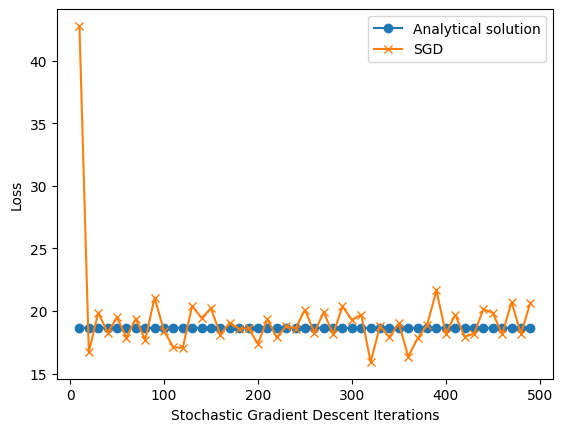

In [ ]:
# Create a line plot
plt.plot(iter_list, analytical_loss, label='Analytical solution', marker='o')
plt.plot(iter_list, sgd_loss, label='SGD', marker='x')

# Set labels and title
plt.xlabel('Stochastic Gradient Descent Iterations')
plt.ylabel('Loss')
# Add a legend
plt.legend()

# Show the plot
plt.show()